In [ ]:
# Spotify 2024 Analysis - Exploratory Data Analysis

In [45]:
# 1. Import Libraries

# Libraries for EDA validation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import chardet
from tabulate import tabulate

# Result
print("EDA Libraries imported successfully")

# Set up visualization style for validation reports
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
sns.set_palette("husl")

# Display options for comprehensive data inspection
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 1000)

# Result
print("EDA environment configured successfully")

EDA Libraries imported successfully
EDA environment configured successfully


In [ ]:
# 2. Load Data for Google Collab

df = pd.read_csv('spotify_cleaned.csv')

In [46]:
## 2.1 Define Utility Functions

# Find project root
def find_project_root(marker_file="spotify_cleaned.csv"):
    current_path = Path(os.getcwd())

    # Search upward through parent folders
    for parent in [current_path] + list(current_path.parents):

        # Check for Data folder with target file
        data_path = parent / "Data" / marker_file
        if data_path.exists():
            print(f"Found project root: {parent}")
            return parent

        # Alternative: check for file directly in parent
        if (parent / marker_file).exists():
            print(f"Found project root: {parent}")
            return parent

    # If not found
    print("Could not locate project root containing your data file")
    print(f"Searching for: {marker_file}")
    print(f"Search path: {current_path} -> {current_path.parents[-1]}")
    return None

# Automatic encoding detection
def detect_encoding(file_path):
    try:
        with open(file_path, 'rb') as file:
            raw_data = file.read(10000)  # First bytes for detection
            result = chardet.detect(raw_data)
            detected_encoding = result['encoding']
            confidence = result['confidence']
            print(f"Detected encoding: {detected_encoding} (confidence: {confidence:.2f})")
            return detected_encoding
    except Exception as e:
        print(f"Encoding detection failed: {e}")
        return None

# Load data function
def load_data():
    data_path = Path("Data") / "spotify_cleaned.csv"

    if not data_path.exists():
        print(f"File not found: {data_path}")
        return None

    # Automatic detection
    detected_encoding = detect_encoding(data_path)
    encodings = [detected_encoding] if detected_encoding else []

    # Manual fallbacks
    encodings.extend(['utf-8', 'utf-8-sig', 'latin-1', 'iso-8859-1', 'cp1252'])
    encodings = list(dict.fromkeys(filter(None, encodings)))  # Remove None and duplicates

    for encoding in encodings:
        try:
            df = pd.read_csv(data_path, encoding=encoding, na_values=['', ' '])
            print(f"Succesfully loaded with {encoding} encoding")
            return df
        except Exception as e:
            print(f"Failed with {encoding}: {str(e)[:100]}...")

    print("\nTry these solutions:")
    print("1. Verify the file exists in the Data folder")
    print("2. Check for file corruption")
    print(f"3. Current directory: {Path.cwd()}")
    return None

In [47]:
## 2.2 Set Working Directory

# Set working directory to project root
project_root = find_project_root()
if project_root:
    os.chdir(project_root)
    print(f"Working directory set to: {project_root}")
else:
    print("Cannot proceed without project root")

Found project root: c:\ARCHIVOS\DOCUMENTS\Mary\Alvaro\Portfolio\Python\Project 1
Working directory set to: c:\ARCHIVOS\DOCUMENTS\Mary\Alvaro\Portfolio\Python\Project 1


In [48]:
## 2.3 Load and Preview the Data

# Load and preview data
print("=== Start Data Load ===")
df = load_data()

if df is not None:
    print("\n === Data Loaded Successfully ===")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    display(df.head(5))
else:
    print("\nFailed to load DataFrame")

=== Start Data Load ===
Detected encoding: utf-8 (confidence: 0.99)
Succesfully loaded with utf-8 encoding

 === Data Loaded Successfully ===
Shape: (4598, 27)

First 5 rows:


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,Million Dollar Baby,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.40,390470936,30716,196631588,92.00,84274754,1713126,5767700,651565900,5332281936,150597040,210,40975,684,62,17598718,114,18004655,22931,2669262,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.90,323703884,28113,174597137,92.00,116347040,3486739,674700,35223547,208339025,156380351,188,40778,3,67,10422430,111,7780028,28444,1118279,1
2,I Like The Way You Kiss Me,I Like The Way You Kiss Me,Artemas,2024-03-19,QZJ842400387,3,538.40,601309283,54331,211607669,92.00,122599116,2228730,3025400,275154237,3369120610,373784955,190,74333,536,136,36321847,172,5022621,5639,5285340,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.90,2031280633,269802,136569078,85.00,1096100899,10629796,7189811,1078757968,14603725994,3351188582,394,1474799,2182,264,24684248,210,190260277,203384,11822942,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.30,107034922,7223,151469874,88.00,77373957,3670188,16400,26576922,266064027,112763851,182,12185,1,82,17660624,105,4493884,7006,457017,1


In [49]:
# 3. Quick sanity check
print("\n" + "="*50)
print("Post-Cleaning Sanity Check".center(50))
print("="*50)
print(f"Shape consistency: {df.shape}")
print(f"Null values:\n{df.isna().sum().to_frame('Null Count')}\n")
print(f"Duplicate rows: {df.duplicated().sum()}")
print("Ready to Start the Exploratory Data Analysis")


            Post-Cleaning Sanity Check            
Shape consistency: (4598, 27)
Null values:
                            Null Count
Track                                0
Album Name                           0
Artist                               0
Release Date                         0
ISRC                                 0
All Time Rank                        0
Track Score                          0
Spotify Streams                      0
Spotify Playlist Count               0
Spotify Playlist Reach               0
Spotify Popularity                   0
YouTube Views                        0
YouTube Likes                        0
TikTok Posts                         0
TikTok Likes                         0
TikTok Views                         0
YouTube Playlist Reach               0
Apple Music Playlist Count           0
AirPlay Spins                        0
SiriusXM Spins                       0
Deezer Playlist Count                0
Deezer Playlist Reach                0
Amazon P

In [ ]:
# 3. EDA Structure Overview

    # 1.Descriptive Statistics
    # 2.Distribution Analysis
    # 3.Correlation Analysis
    # 4.Temporal Analysis
    # 5.Artist/Track Analysis
    # 6.Platform Comparison
    # 7.Explicit Content Analysis
    # 8.Key Insights & Visualizations

In [ ]:
# 1.Descriptive Statistics

In [ ]:
# Basic Statistics

In [50]:
# Check for Data Types
df.dtypes
# Data Types of Protected Columns(From 02_data_cleaning) are not the same, fix it

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                   int64
Track Score                   float64
Spotify Streams                 int64
Spotify Playlist Count          int64
Spotify Playlist Reach          int64
Spotify Popularity            float64
YouTube Views                   int64
YouTube Likes                   int64
TikTok Posts                    int64
TikTok Likes                    int64
TikTok Views                    int64
YouTube Playlist Reach          int64
Apple Music Playlist Count      int64
AirPlay Spins                   int64
SiriusXM Spins                  int64
Deezer Playlist Count           int64
Deezer Playlist Reach           int64
Amazon Playlist Count           int64
Pandora Streams                 int64
Pandora Track Stations          int64
Shazam Counts                   int64
Explicit Tra

In [51]:
# Convert columns to optimal types
df['Track'] = df['Track'].astype('string')
df['Artist'] = df['Artist'].astype('string')
df['Album Name'] = df['Album Name'].astype('string')
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
print("Converted text columns to optimized types (string/datetime)")

Converted text columns to optimized types (string/datetime)


In [52]:
# Validate change applied
df.dtypes

Track                         string[python]
Album Name                    string[python]
Artist                        string[python]
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                          int64
Track Score                          float64
Spotify Streams                        int64
Spotify Playlist Count                 int64
Spotify Playlist Reach                 int64
Spotify Popularity                   float64
YouTube Views                          int64
YouTube Likes                          int64
TikTok Posts                           int64
TikTok Likes                           int64
TikTok Views                           int64
YouTube Playlist Reach                 int64
Apple Music Playlist Count             int64
AirPlay Spins                          int64
SiriusXM Spins                         int64
Deezer Playlist Count                  int64
Deezer Playlist Reach                  int64
Amazon Pla

In [53]:
# Numerical Columns
print("\n=== Basic Statistics for Numerical columns===")
display(df.describe().T)


=== Basic Statistics for Numerical columns===


,count,mean,min,25%,50%,75%,max,std
Release Date,4598,2021-01-27 10:44:50.213136128,1987-07-21 00:00:00,2019-07-17 06:00:00,2022-06-01 00:00:00,2023-08-11 00:00:00,2024-06-14 00:00:00,NaN
All Time Rank,4598.00,2290.40,1.00,1144.25,2289.50,3435.75,4998.00,1323.06
Track Score,4598.00,41.85,19.40,23.30,29.90,44.48,725.40,38.55
Spotify Streams,4598.00,442305987.28,1071.00,73153081.75,239850720.00,611891973.75,4281468720.00,532860205.52
Spotify Playlist Count,4598.00,58985.16,1.00,7017.25,32312.00,84952.75,590392.00,70679.71
Spotify Playlist Reach,4598.00,23193804.56,1.00,4896218.75,13264112.00,29313280.00,262343414.00,29485961.58
Spotify Popularity,4598.00,64.11,1.00,62.00,67.00,71.00,96.00,14.77
YouTube Views,4598.00,385735283.53,913.00,45764910.00,148269610.00,420280776.25,16322756555.00,681064755.45
YouTube Likes,4598.00,2816063.93,25.00,448653.00,1257935.00,3354939.00,62311179.00,4454401.38
TikTok Posts,4598.00,750345.07,1.00,67425.00,182529.00,460333.75,42900000.00,2134178.75


In [54]:
# Create Table for Documentation

# Install tabulate
!pip install tabulate

# Create a list for the columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
stats = df[numeric_cols].describe().T[['count','mean','min','25%','50%','75%','max','std']]

# Give a better format to the Numbers
def format_numbers(x):
    if isinstance(x, (int, float)):
        if x > 1e9:
            return f"{x/1e9:.1f}B"
        elif x > 1e6:
            return f"{x/1e6:.1f}M"
        elif x > 1e3:
            return f"{x/1e3:.1f}K"
        return f"{x:.2f}"
    return str(x)

# Apply format
stats_formatted = stats.map(format_numbers)

# Export to md
print(tabulate(stats_formatted, headers='keys', tablefmt='pipe', stralign='right'))

# Copy table and paste to md

|                            |   count |   mean |    min |    25% |    50% |    75% |    max |    std |
|---------------------------:|--------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|
|              All Time Rank |    4.6K |   2.3K |   1.00 |   1.1K |   2.3K |   3.4K |   5.0K |   1.3K |
|                Track Score |    4.6K |  41.85 |  19.40 |  23.30 |  29.90 |  44.48 | 725.40 |  38.55 |
|            Spotify Streams |    4.6K | 442.3M |   1.1K |  73.2M | 239.9M | 611.9M |   4.3B | 532.9M |
|     Spotify Playlist Count |    4.6K |  59.0K |   1.00 |   7.0K |  32.3K |  85.0K | 590.4K |  70.7K |
|     Spotify Playlist Reach |    4.6K |  23.2M |   1.00 |   4.9M |  13.3M |  29.3M | 262.3M |  29.5M |
|         Spotify Popularity |    4.6K |  64.11 |   1.00 |  62.00 |  67.00 |  71.00 |  96.00 |  14.77 |
|              YouTube Views |    4.6K | 385.7M | 913.00 |  45.8M | 148.3M | 420.3M |  16.3B | 681.1M |
|              YouTube Likes |    4.6K |   2.8M |  25.00 | 448.7


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
 # 2.Distribution Analysis

In [55]:
# Function to analyze which numeric columns in a DataFrame may benefit from a log transform
# The idea: columns with large value ranges and skewness often become more normal after log transform,
# which helps in modeling or visualization.
def analyze_log_transform_requirements(df, ratio_threshold=100, skew_threshold=2):
    """
    Parameters:
    df : pandas.DataFrame
        The dataset to check numeric columns on.
    ratio_threshold : float
        Threshold for max/min value ratio; large values suggest log transform.
    skew_threshold : float
        Threshold for skewness; high skew means asymmetric distribution.

    Returns:
    dict :
        Classification of numeric columns into three groups:
        - 'needs_log_transform': highly skewed with large range
        - 'normal_distribution': roughly normal, no transform needed
        - 'cannot_log_transform': columns with zeros/negatives where log is invalid
    """

    # Select numeric columns only (integers or floats)
    # This uses pandas' select_dtypes to filter columns by data type.
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    # Prepare a dictionary to store column names based on their classification
    # Initial lists are empty and will be populated in the loop below.
    results = {
        'needs_log_transform': [],       # Skewed, large range columns for log transform
        'normal_distribution': [],       # Columns with roughly normal distribution
        'cannot_log_transform': []       # Columns containing zero or negative values (log undefined)
    }

    # Loop through each numeric column to analyze its properties
    for col in numeric_cols:
        # Access the actual data in the column as a pandas Series for analysis
        series = df[col]

        # Check if there are zero or negative values in the column
        # Since log(0) or log(negative) is undefined, skip these columns for log transform
        if series.min() <= 0:
            # Add column name to 'cannot_log_transform' category
            results['cannot_log_transform'].append(col)
            # Skip further analysis for this column and continue with next
            continue

        # Calculate minimum and maximum values in the column
        min_val = series.min()
        max_val = series.max()

        # Calculate ratio of max to min values
        # This ratio indicates the range spread; large ratio suggests heavy-tailed distribution
        ratio = max_val / min_val if min_val > 0 else np.inf

        # Calculate skewness of the column data using pandas' built-in method
        # Skewness measures asymmetry: 0 is symmetric, positive or negative values mean skewed
        skewness = series.skew()

        # Determine if column meets criteria for log transform based on thresholds:
        # 1) High ratio indicating wide spread of values
        # 2) High absolute skewness indicating asymmetry
        high_ratio = ratio > ratio_threshold
        high_skew = abs(skewness) > skew_threshold

        # If both conditions hold, we mark the column as needing log transform
        needs_log = high_ratio and high_skew

        # Add the column to the appropriate category based on the analysis
        if needs_log:
            results['needs_log_transform'].append(col)
        else:
            # If not needing log, assume roughly normal distribution
            results['normal_distribution'].append(col)

    # After analyzing all columns, return the dictionary with the classified results
    return results

In [56]:
# Create a function for visualizing distributions and applying log transform if needed
def create_distribution_visualizations(df, target_columns=None, ratio_threshold=100, skew_threshold=2):
    """
    Parameters:
    df : pandas.DataFrame
        The dataset to analyze.
    target_columns : list, optional
        List of specific columns to analyze. If None, all numeric columns will be analyzed.
    ratio_threshold : float
        Threshold for max/min ratio to decide if log transform is needed.
    skew_threshold : float
        Threshold for skewness to decide if log transform is needed.
    """

    # If the user provided a list of columns, filter the DataFrame
    if target_columns:
        # Keep only columns that actually exist in the DataFrame
        available_cols = [col for col in target_columns if col in df.columns]

        # Warn if any provided column names are not found
        if len(available_cols) != len(target_columns):
            missing = set(target_columns) - set(available_cols)
            print(f"Warning: These columns were not found: {missing}")

        # Use the filtered columns for analysis
        analysis_df = df[available_cols]
    else:
        # If no specific columns are given, analyze the whole DataFrame
        analysis_df = df

    # Analyze which numeric columns need log transformation
    analysis_results = analyze_log_transform_requirements(analysis_df, ratio_threshold, skew_threshold)

    # Print a summary of the analysis
    print("="*60)
    print("Automatic Column Analysis Results")
    print("="*60)
    print(f"Normal Distribution: {analysis_results['normal_distribution']}")
    print(f"Need Log Transform: {analysis_results['needs_log_transform']}")
    print(f"Cannot Log Transform: {analysis_results['cannot_log_transform']}")
    print()

    # Combine the columns that we want to visualize (normal + needs log)
    all_metrics = analysis_results['normal_distribution'] + analysis_results['needs_log_transform']

    # If there's nothing to visualize, stop here
    if not all_metrics:
        print("No suitable columns found for visualization.")
        return analysis_results

    # Part 1: Plot original distributions

    print("Creating Original Distribution Plots...")

    # Decide grid size for plots depending on how many columns we have
    n_metrics = len(all_metrics)
    if n_metrics <= 2:
        rows, cols = 1, n_metrics
        figsize = (9 * n_metrics, 6)
    elif n_metrics <= 4:
        rows, cols = 2, 2
        figsize = (18, 12)
    elif n_metrics <= 6:
        rows, cols = 3, 2
        figsize = (18, 15)
    else:
        rows, cols = (n_metrics + 1) // 2, 2
        figsize = (18, 5 * rows)

    # Set up the figure size
    plt.figure(figsize=figsize)

    # Plot original histograms with KDE (smoothed line) for each column
    for i, metric in enumerate(all_metrics, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[metric], kde=True, bins=30,color='#1DB954')
        plt.xlim(left=0)
        plt.ylim(bottom=0)

        # Remove duplicate zero on the Y-axis
        ax = plt.gca()
        y_ticks = ax.get_yticks()
        if len(y_ticks) > 1:
            ax.set_yticks(y_ticks[1:])

        # Add title and axis labels
        plt.title(f'Distribution of {metric}')
        plt.xlabel(metric)
        plt.ylabel('Frequency')

        # Add red line showing the median value
        median_val = df[metric].median()
        plt.axvline(median_val, color='green', linestyle='--',
                    label=f'Median: {median_val:,.0f}')
        plt.legend()

    # Adjust layout to avoid overlapping
    plt.tight_layout()
    plt.show()

    # Part 2: Log-Transformed Distributions (Skewed columns only)

    skewed_metrics = analysis_results['needs_log_transform']

    if skewed_metrics:
        print(f"\nCreating Log-Transformed Plots for Skewed Columns...")
        print(f"Columns requiring log transformation: {skewed_metrics}")

        n_metrics = len(skewed_metrics)
        if n_metrics <= 2:
            rows, cols = 1, n_metrics
            figsize = (9 * n_metrics, 6)
        elif n_metrics <= 4:
            rows, cols = 2, 2
            figsize = (18, 12)
        elif n_metrics <= 6:
            rows, cols = 3, 2
            figsize = (18, 15)
        else:
            rows, cols = (n_metrics + 1) // 2, 2
            figsize = (18, 5 * rows)

        plt.figure(figsize=figsize)

        for i, metric in enumerate(skewed_metrics, 1):
            if df[metric].min() > 0:
                log_data = np.log1p(df[metric])

                plt.subplot(rows, cols, i)
                sns.histplot(log_data, kde=True, bins=30,color='#1DB954')
                plt.ylim(bottom=0)

                ax = plt.gca()
                y_ticks = ax.get_yticks()
                if len(y_ticks) > 1:
                    ax.set_yticks(y_ticks[1:])

                plt.title(f'Log-Transformed: {metric}')
                plt.xlabel(f'log1p({metric})')
                plt.ylabel('Frequency')

                log_median = log_data.median()
                plt.axvline(log_median, color='green', linestyle='--',
                            label=f'Log Median: {log_median:.2f}')
                plt.legend()
            else:
                print(f"Warning: {metric} contains non-positive values, skipping log transformation.")

        plt.tight_layout()
        plt.show()
    else:
      print("\nNo columns require log transformation based on the analysis.")

    # Part 3: Side-by-side Comparison Plots

    if skewed_metrics:
        print(f"\nCreating Comparison Plots (Original vs Log-Transformed)...")

        for metric in skewed_metrics:
            if df[metric].min() > 0:
                # Create two plots side by side: original and log-transformed
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

                # Original distribution plot
                sns.histplot(df[metric], kde=True, bins=30, ax=ax1,color='#1DB954')
                ax1.set_xlim(left=0)
                ax1.set_ylim(bottom=0)

                # Remove duplicate zero on Y-axis
                y_ticks1 = ax1.get_yticks()
                if len(y_ticks1) > 1:
                    ax1.set_yticks(y_ticks1[1:])

                # Add red line for median
                median_val = df[metric].median()
                ax1.axvline(median_val, color='green', linestyle='--',
                           label=f'Median: {median_val:,.0f}')
                ax1.set_title(f'Original: {metric}')
                ax1.set_xlabel(metric)
                ax1.set_ylabel('Frequency')
                ax1.legend()

                # Log-transformed distribution
                log_data = np.log1p(df[metric])
                sns.histplot(log_data, kde=True, bins=30, ax=ax2, color='#1DB954')
                ax2.set_ylim(bottom=0)

                # Add red line for median of log values
                log_median = log_data.median()
                ax2.axvline(log_median, color='green', linestyle='--',
                           label=f'Log Median: {log_median:.2f}')
                ax2.set_title(f'Log-Transformed: {metric}')
                ax2.set_xlabel(f'log1p({metric})')
                ax2.set_ylabel('Frequency')
                ax2.legend()

                plt.tight_layout()
                plt.show()

    # Return the result so it can be used for other analysis
    return analysis_results

Music Metrics:['Spotify Streams', 'YouTube Views', 'TikTok Views', 'YouTube Likes', 'TikTok Likes', 'Spotify Playlist Reach', 'YouTube Playlist Reach', 'Explicit Track']
Automatic Column Analysis Results
Normal Distribution: []
Need Log Transform: ['Spotify Streams', 'YouTube Views', 'TikTok Views', 'YouTube Likes', 'TikTok Likes', 'Spotify Playlist Reach', 'YouTube Playlist Reach']
Cannot Log Transform: ['Explicit Track']

Creating Original Distribution Plots...


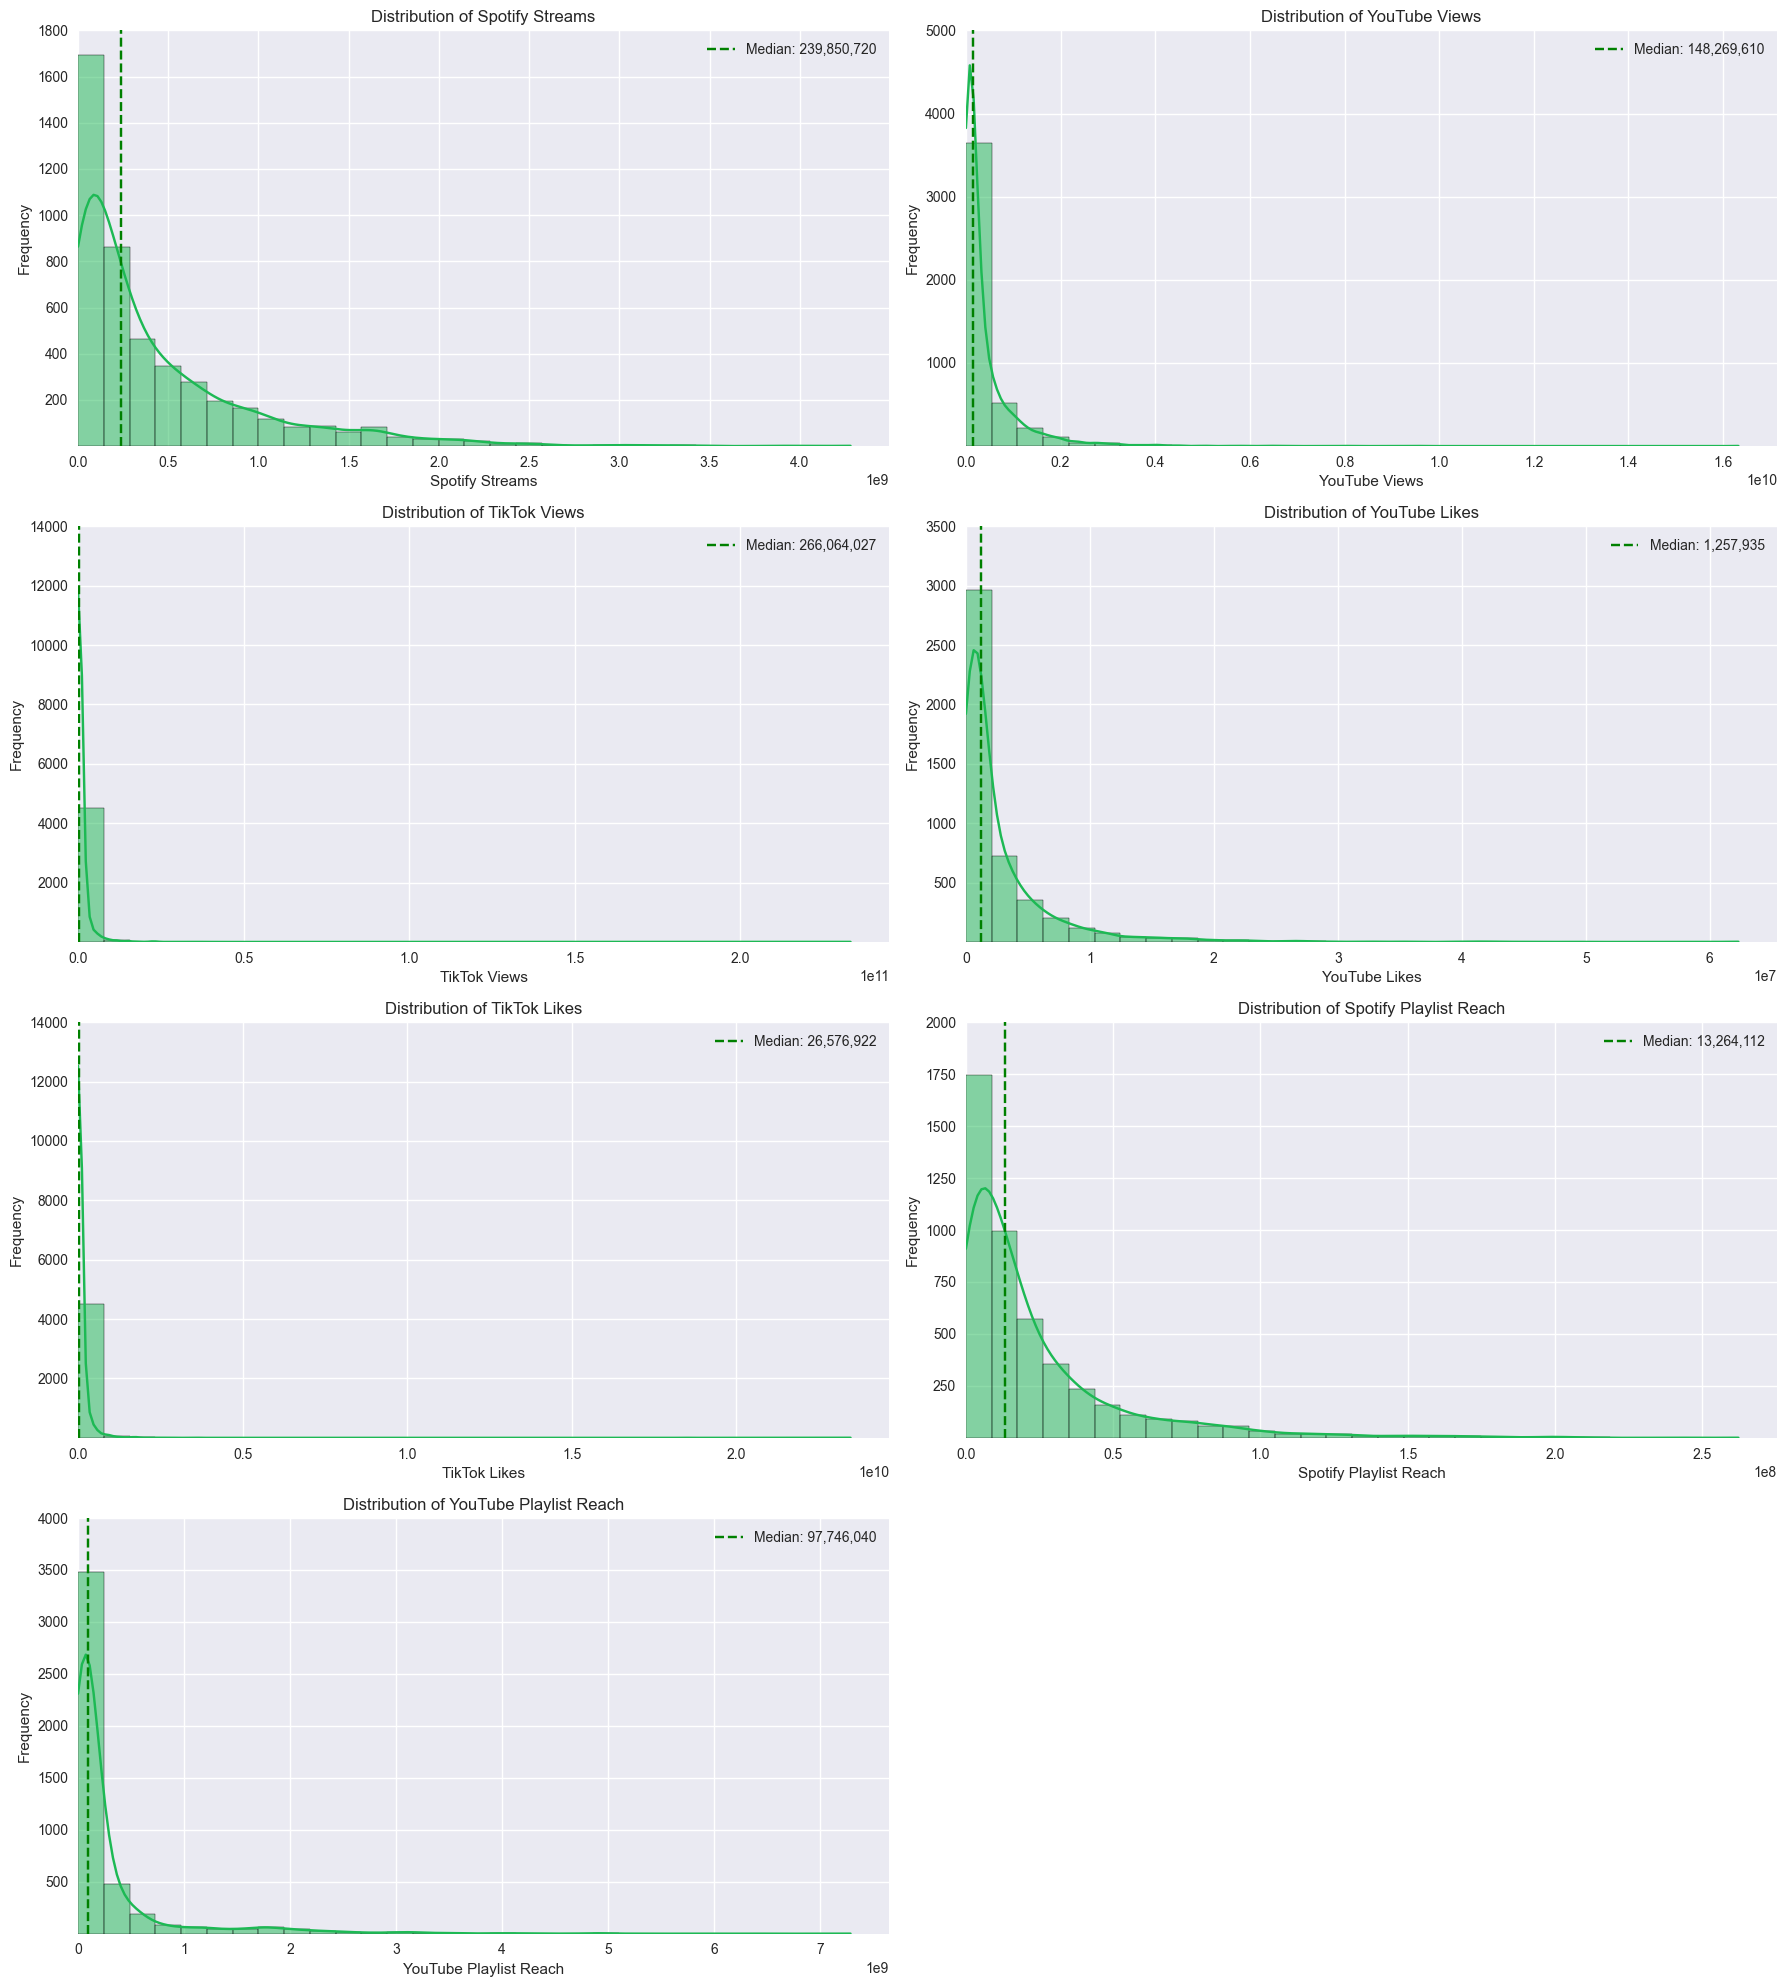


Creating Log-Transformed Plots for Skewed Columns...
Columns requiring log transformation: ['Spotify Streams', 'YouTube Views', 'TikTok Views', 'YouTube Likes', 'TikTok Likes', 'Spotify Playlist Reach', 'YouTube Playlist Reach']


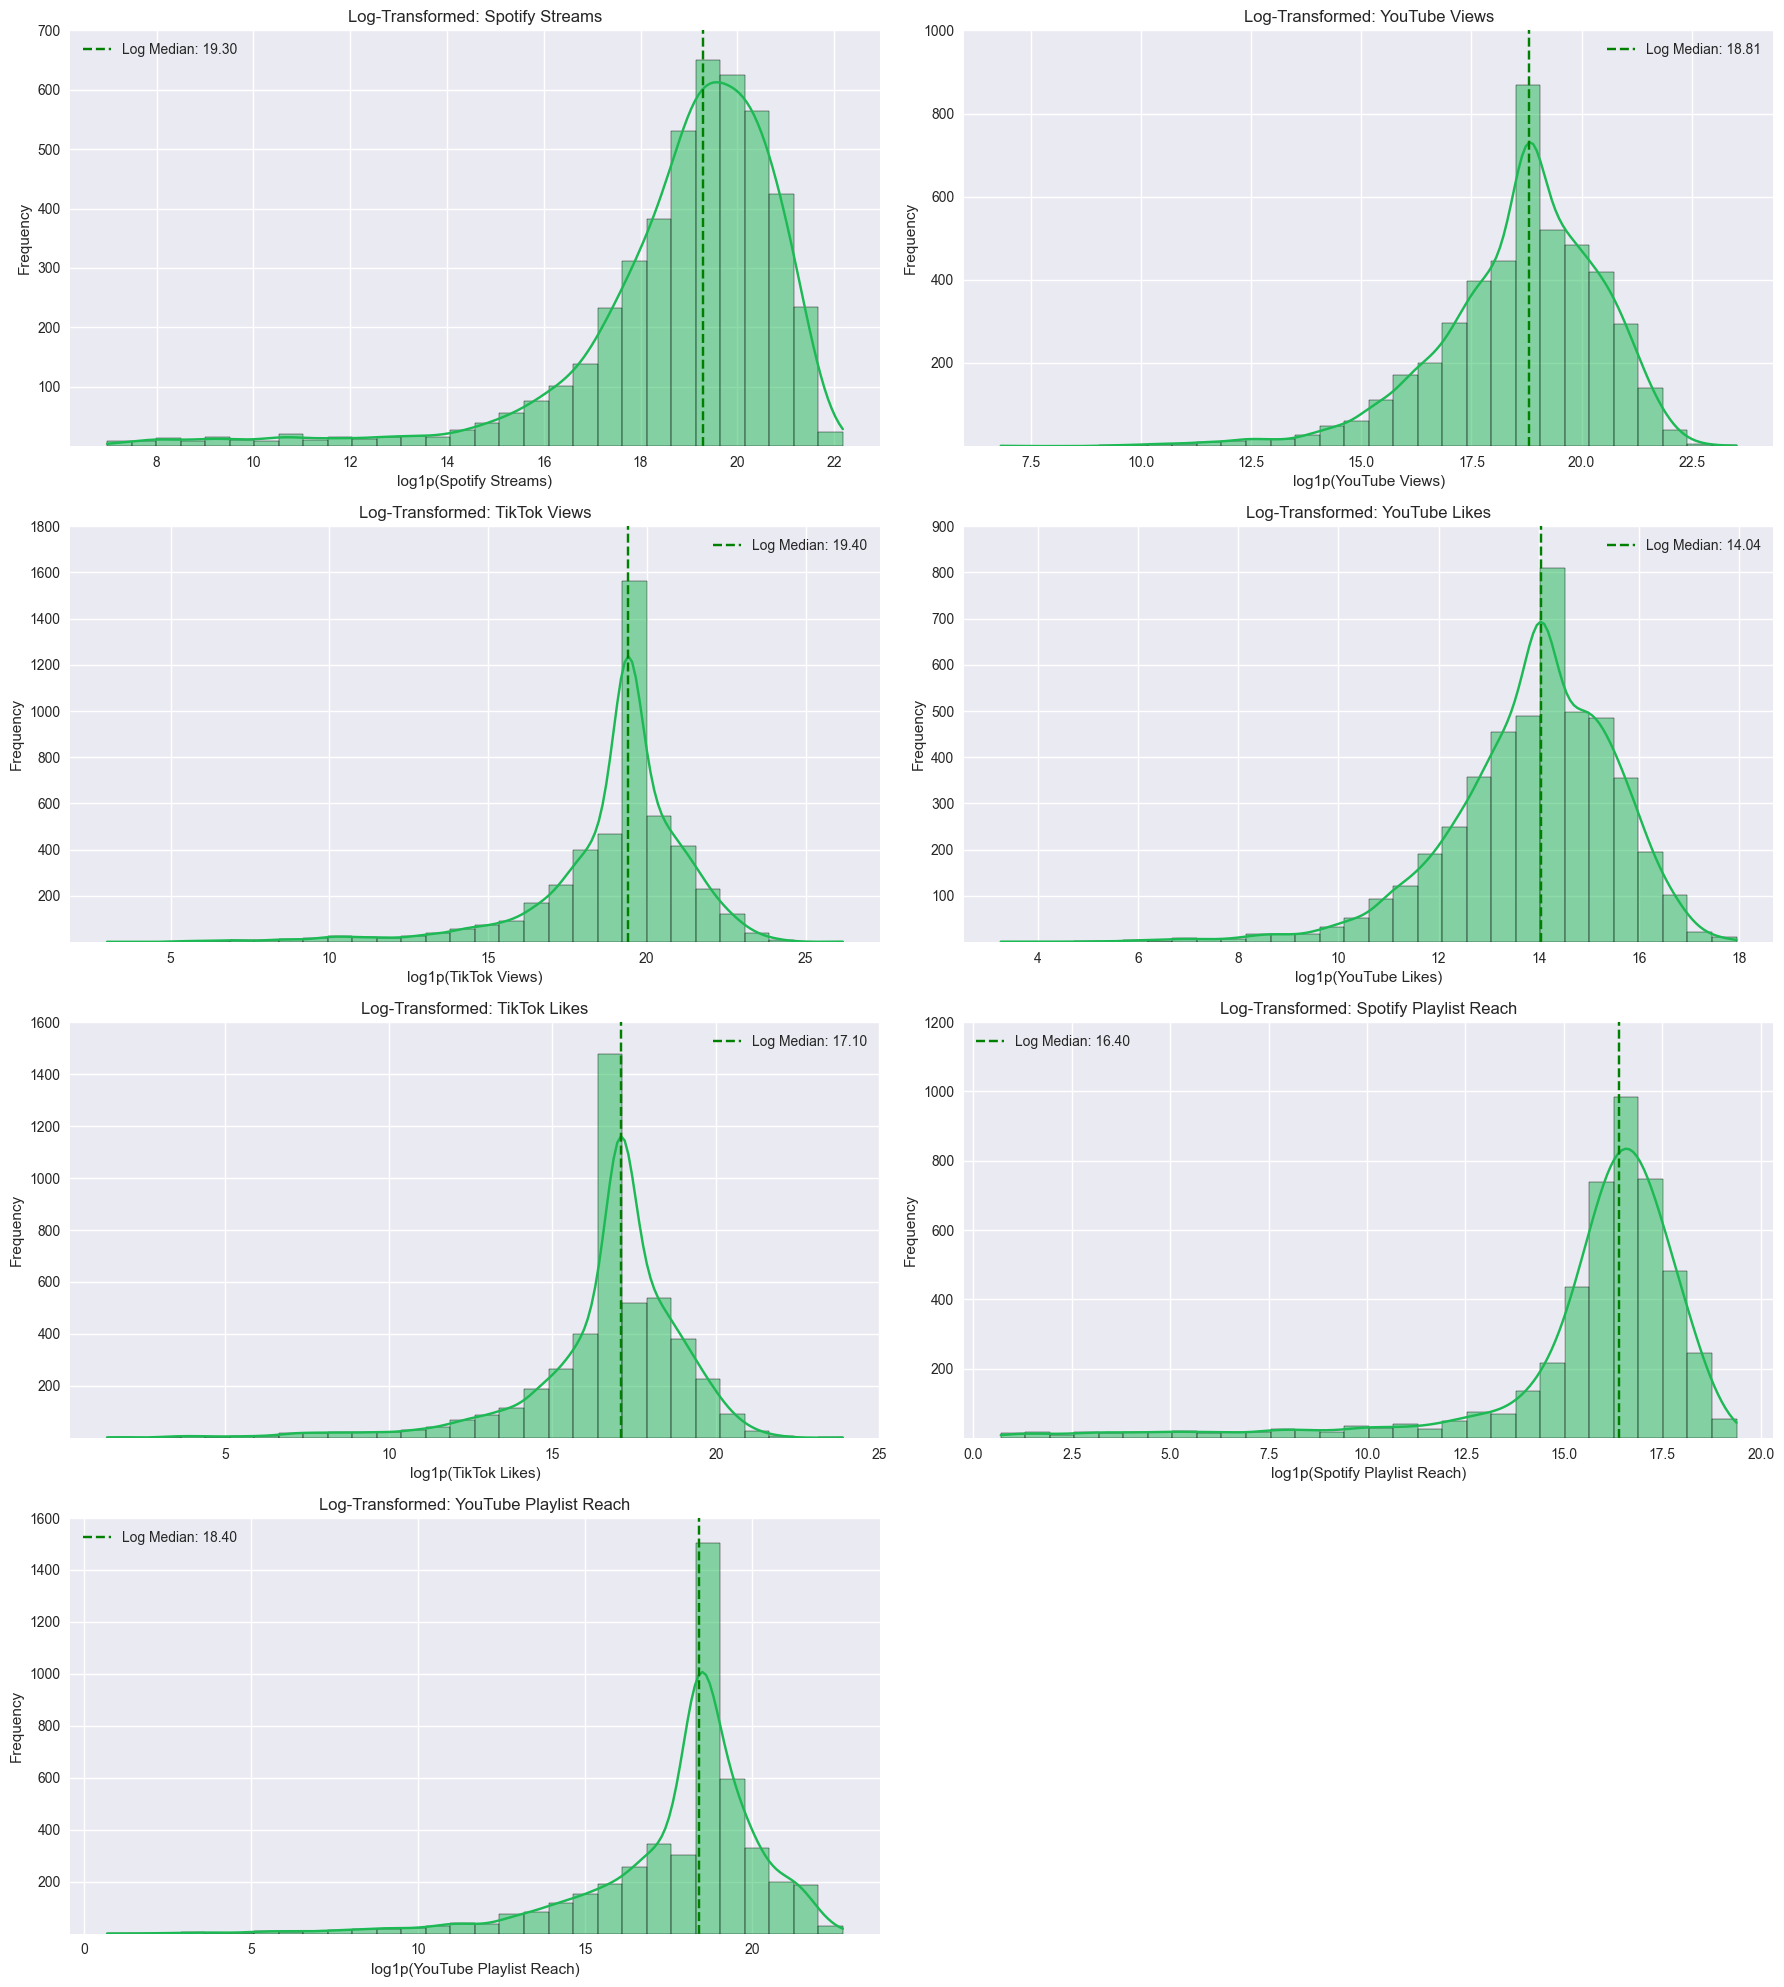


Creating Comparison Plots (Original vs Log-Transformed)...


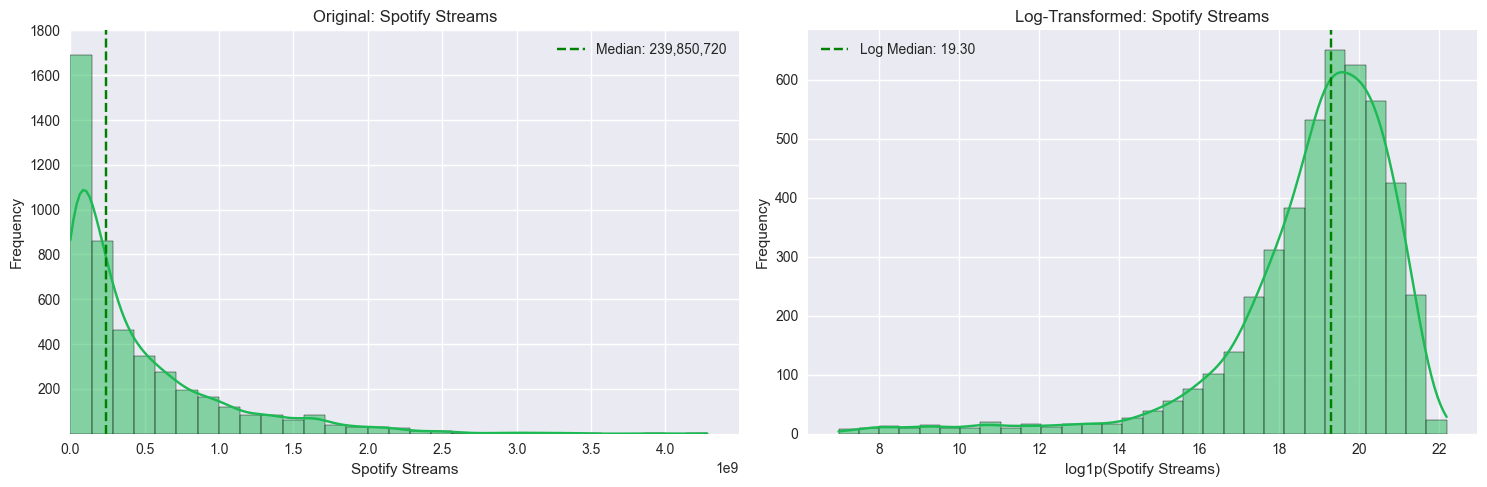

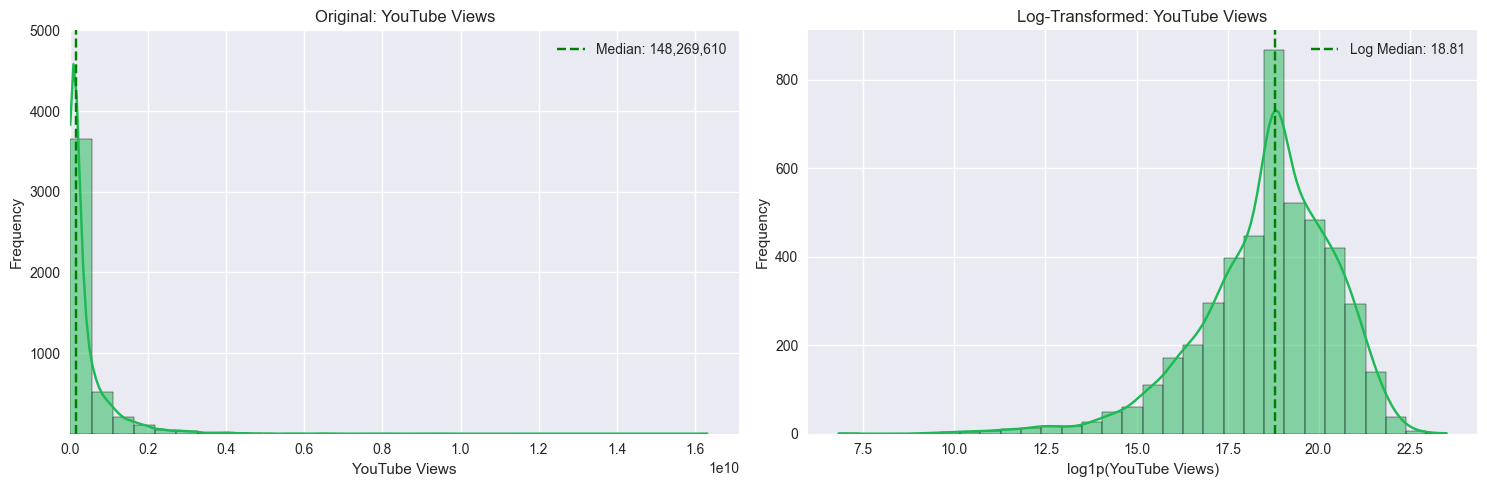

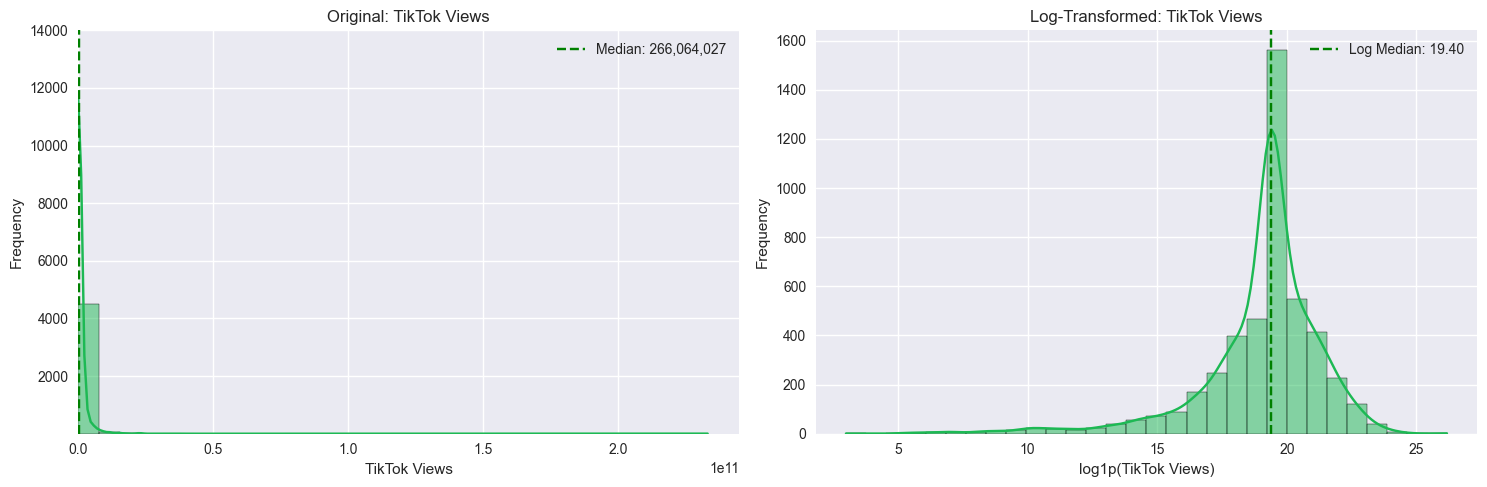

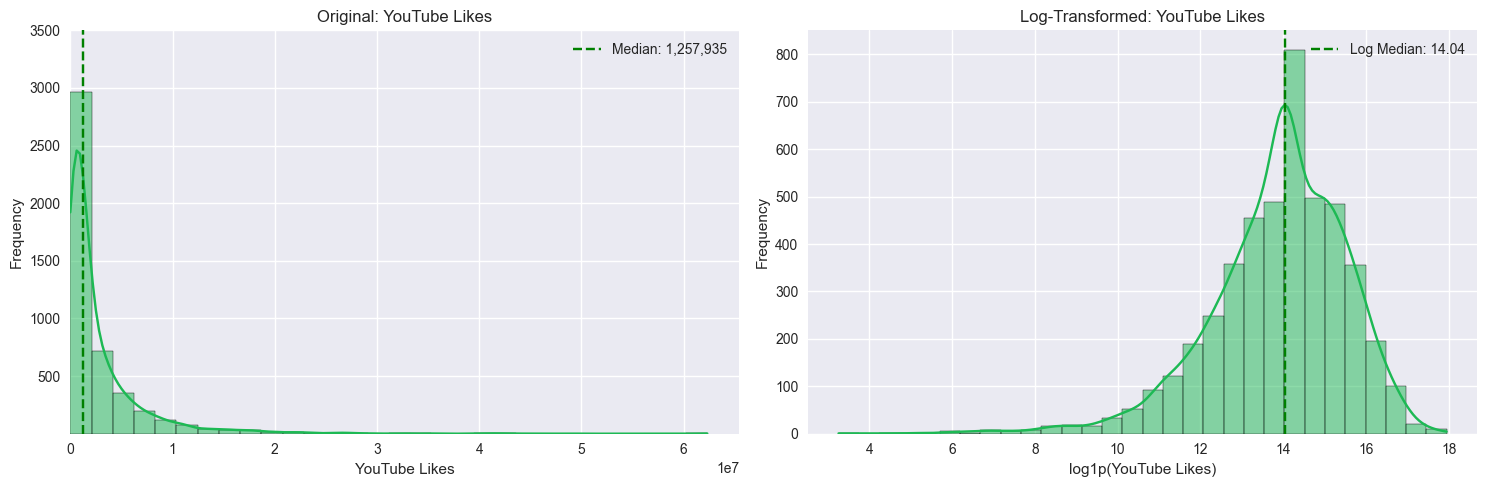

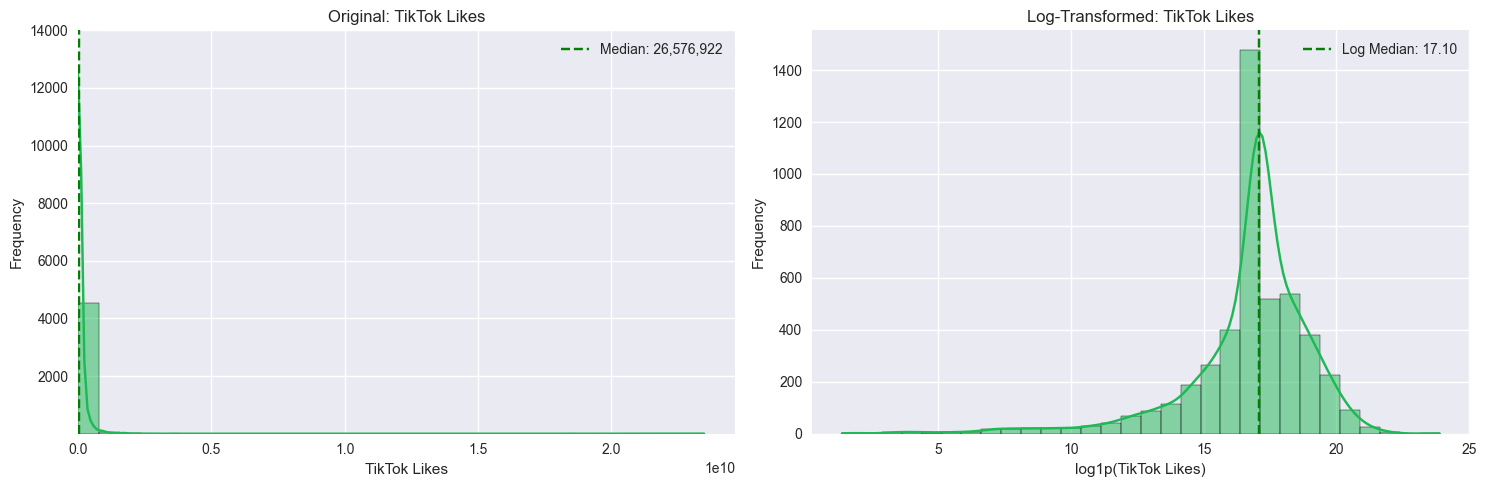

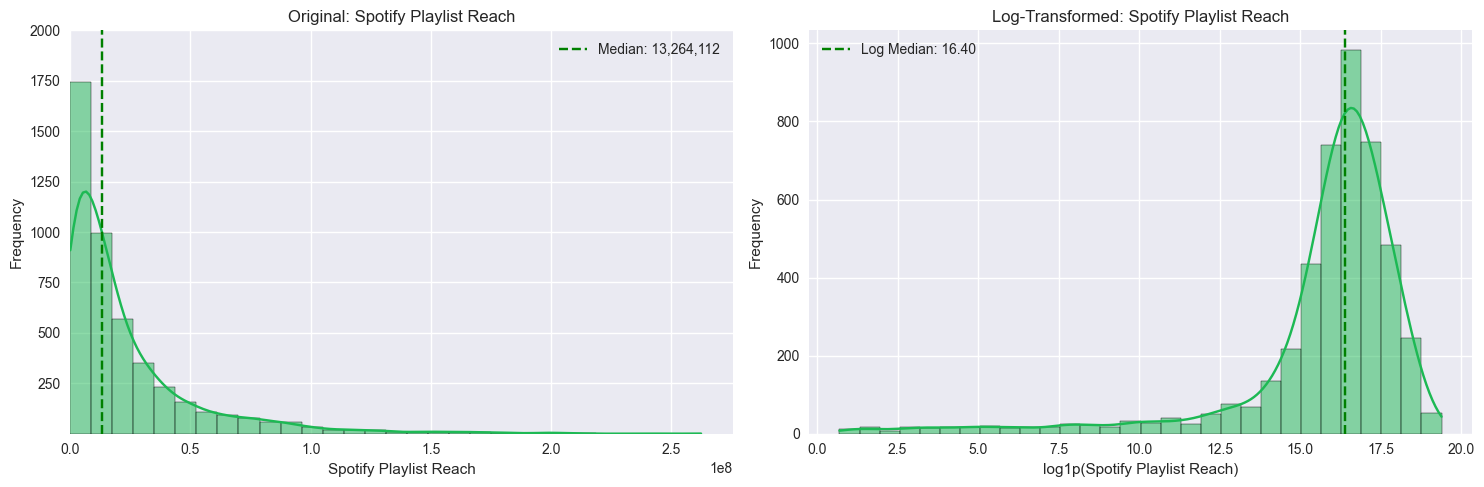

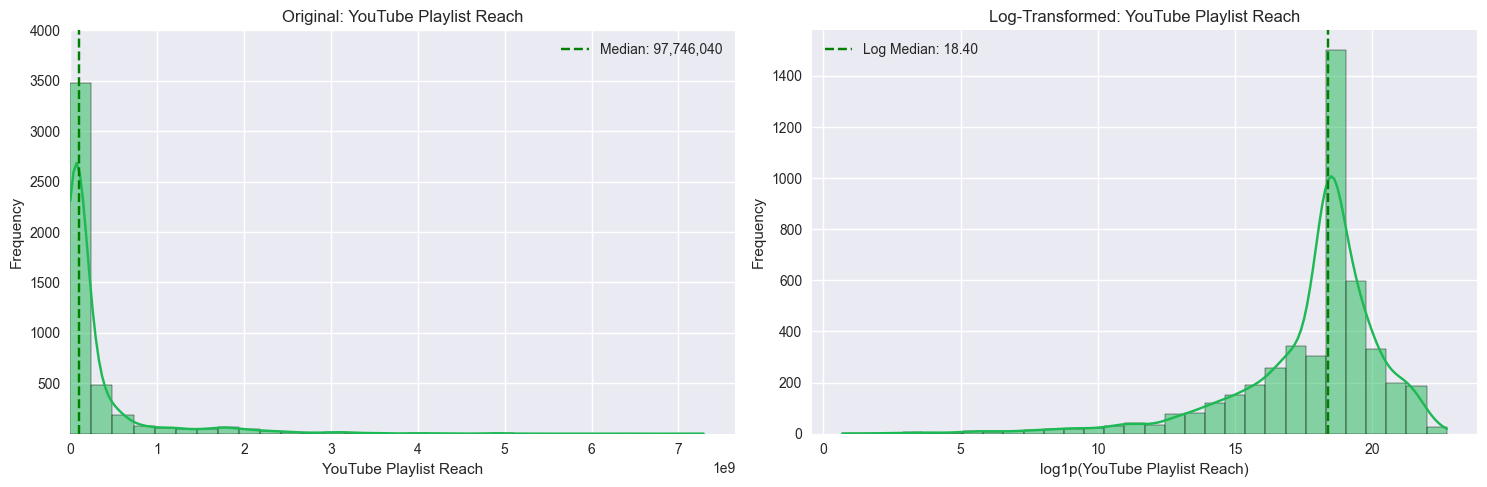


Algorithm Decisions Summary
Columns that needed log transformation: ['Spotify Streams', 'YouTube Views', 'TikTok Views', 'YouTube Likes', 'TikTok Likes', 'Spotify Playlist Reach', 'YouTube Playlist Reach']
Columns with normal distribution: []
Columns that cannot use log transformation: ['Explicit Track']


In [57]:
# Define the specific music metrics you want to analyze
# These should match the column names in your DataFrame
music_metrics = [
    'Spotify Streams', 'YouTube Views','TikTok Views',
    'YouTube Likes','TikTok Likes','Spotify Playlist Reach',
    'YouTube Playlist Reach','Explicit Track'
]
print(f"Music Metrics:{music_metrics}")

# Run the full visualization and log-transform analysis function
# Pass the selected music-related columns as the 'target_columns' parameter
results = create_distribution_visualizations(df, target_columns=music_metrics)

# Show summary of the results after the function call
print("\n" + "="*50)
print("Algorithm Decisions Summary")
print("="*50)
print(f"Columns that needed log transformation: {results['needs_log_transform']}")
print(f"Columns with normal distribution: {results['normal_distribution']}")
print(f"Columns that cannot use log transformation: {results['cannot_log_transform']}")



In [ ]:
# 3.Correlation Analysis

Applied log 10 transformation to: All Time Rank
Applied log 10 transformation to: Track Score
Applied log 10 transformation to: Spotify Streams
Applied log 10 transformation to: Spotify Playlist Count
Applied log 10 transformation to: Spotify Playlist Reach
Applied log 10 transformation to: Spotify Popularity
Applied log 10 transformation to: YouTube Views
Applied log 10 transformation to: YouTube Likes
Applied log 10 transformation to: TikTok Posts
Applied log 10 transformation to: TikTok Likes
Applied log 10 transformation to: TikTok Views
Applied log 10 transformation to: YouTube Playlist Reach
Applied log 10 transformation to: Apple Music Playlist Count
Applied log 10 transformation to: AirPlay Spins
Applied log 10 transformation to: SiriusXM Spins
Applied log 10 transformation to: Deezer Playlist Count
Applied log 10 transformation to: Deezer Playlist Reach
Applied log 10 transformation to: Amazon Playlist Count
Applied log 10 transformation to: Pandora Streams
Applied log 10 tran

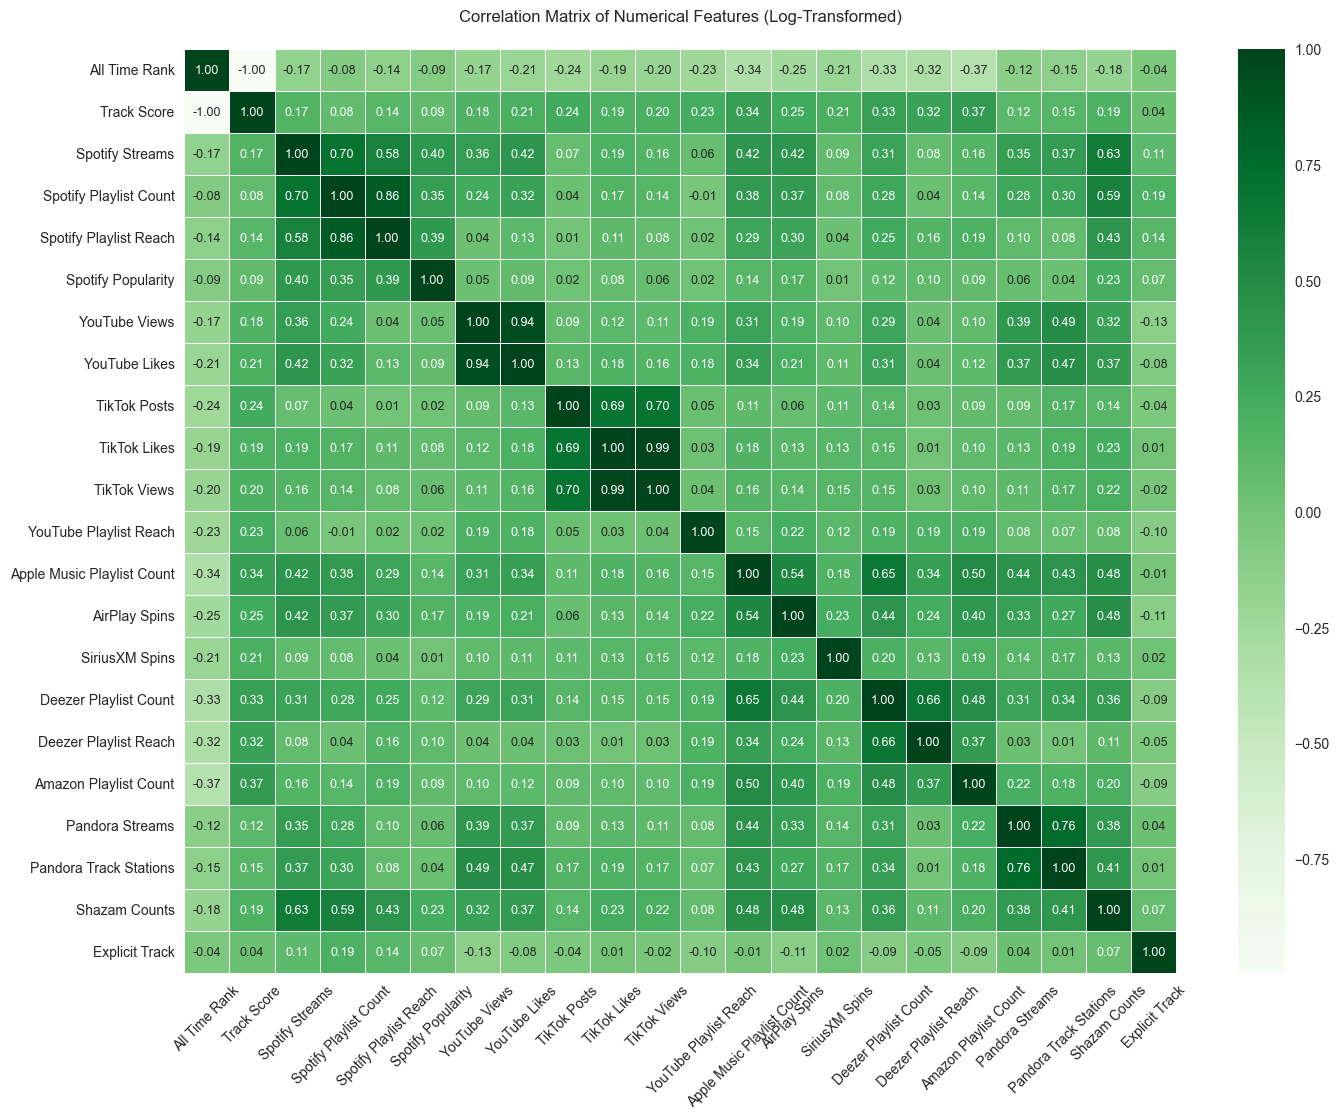

In [58]:
# Use numerical columns
num_cols = df.select_dtypes(include=['Int64','float64']).columns
# Apply log transformation to all columns for consistency
df_log = df[num_cols].copy()
for col in num_cols:
  df_log[col] = np.log10(df[col]+1) # Add 1 to handle zeros, then apply log10 to all numerical variables
  print(f"Applied log 10 transformation to: {col}")
# Correlation Matrix
corr_matrix = df_log.corr()

# Create a Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap='Greens',
            center=0, linewidths=.5,annot_kws={"size":9})
plt.title('Correlation Matrix of Numerical Features (Log-Transformed)',pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig('Visualizations/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [59]:
# Correlated pairs
corr_pairs = corr_matrix.unstack()
# Cleaned (Without duplicates between pairs of the correlation matrix )
corr_pairs_clean = corr_pairs[corr_pairs < 1].drop_duplicates()
top_corr = corr_pairs_clean.nlargest(10)     # Top Correlated Pairs
bottom_corr = corr_pairs_clean.nsmallest(10) # Bottom Correlated Pairs

# Top Positive Correlations
print("\nTop Positive Correlations:")
display(top_corr.to_frame('Correlation'))
# Top Negative Correlations
print("\nTop Negative Correlations: ")
display(bottom_corr.to_frame('Correlation'))


Top Positive Correlations:


,,Correlation
TikTok Likes,TikTok Views,0.99
YouTube Views,YouTube Likes,0.94
Spotify Playlist Count,Spotify Playlist Reach,0.86
Pandora Streams,Pandora Track Stations,0.76
TikTok Posts,TikTok Views,0.70
Spotify Streams,Spotify Playlist Count,0.70
TikTok Posts,TikTok Likes,0.69
Deezer Playlist Count,Deezer Playlist Reach,0.66
Apple Music Playlist Count,Deezer Playlist Count,0.65
Spotify Streams,Shazam Counts,0.63



Top Negative Correlations: 


Correlation
All Time Rank Track Score                       -1.00
              Amazon Playlist Count             -0.37
              Apple Music Playlist Count        -0.34
              Deezer Playlist Count             -0.33
              Deezer Playlist Reach             -0.32
              AirPlay Spins                     -0.25
              TikTok Posts                      -0.24
              YouTube Playlist Reach            -0.23
              SiriusXM Spins                    -0.21
              YouTube Likes                     -0.21

Top correlated pairs for scatter plots:
[('YouTube Likes', 'YouTube Views'), ('TikTok Likes', 'TikTok Views'), ('Spotify Playlist Count', 'Spotify Playlist Reach')]


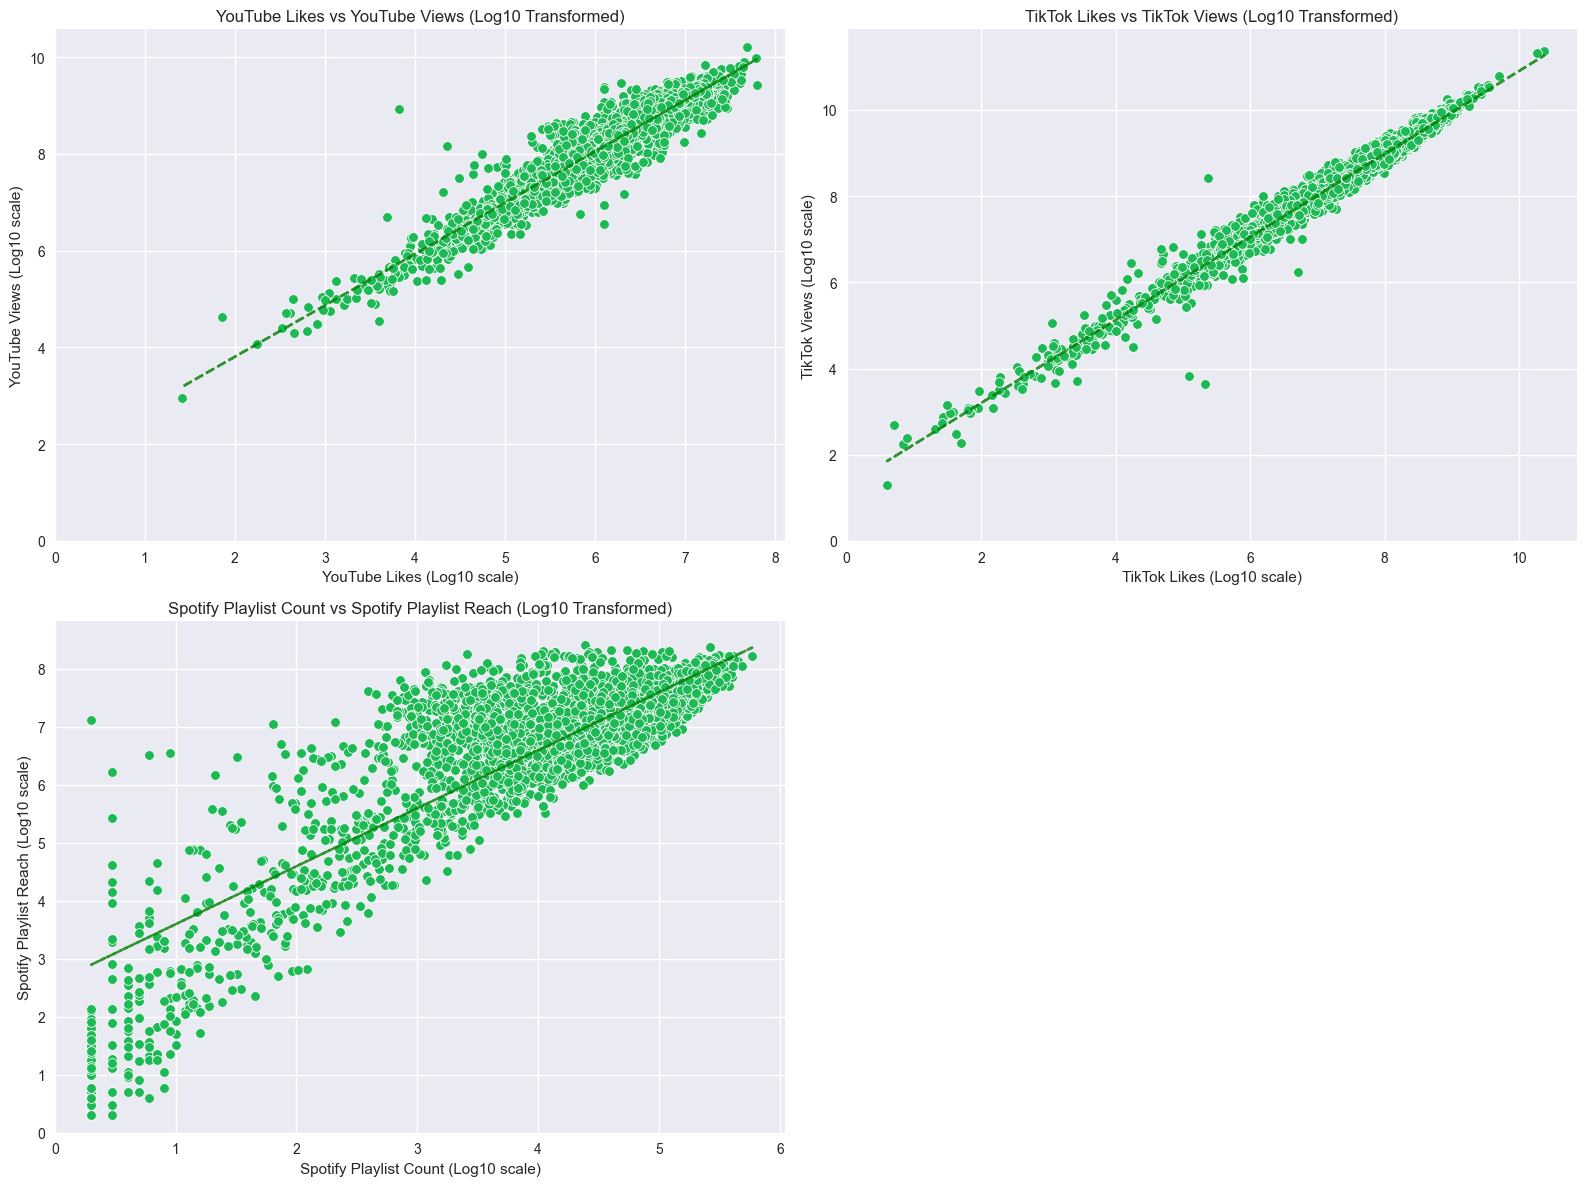

In [60]:
# Scatter Plots for High Correlations

# Create the variable (list) to keep the High Correlated Pairs
high_corr_pairs = []
# Find the Higher Correlations (Defined with a corr()>0.8)
for pair1 in corr_matrix.columns: # Create a iteration to look for the first pair in the columns of the var (corr_matrix)
  for pair2 in corr_matrix.columns: # Make other iteration to look for the second pair
    if pair1 != pair2 and corr_matrix.loc[pair1,pair2] > 0.8: # Create condition where the pairs dont have to be equal and the corr is > 0.8
      high_corr_pairs.append((pair1,pair2))  # Keep the pairs in the variable that you create previously

# Remove Duplicates in the pairs
high_corr_pairs = list(set(tuple(sorted(pair)) for pair in high_corr_pairs))
# The aim of this variable is:
# Convert as a list(Remove Duplicates(Take a list of pairs(Sort them alphabetically(pairs)) for the pair in the variable created))
print("Top correlated pairs for scatter plots:")
print(high_corr_pairs)

# Create plot
# Create a loop that make a iteration on each tuple in the var
# Based on that loop, create the figure defined as a scatterplot with size(Width/height)
# from the df using the variables from the iteration (x,y) giving respective names
# with title using the real names of the variables from the axis
# and showing the plot

# Define 2 graphs by row
n_plots = len(high_corr_pairs)
n_cols = 2
n_rows = (n_plots + 1) // n_cols # Enough rows for all

fig, axes = plt.subplots(n_rows, n_cols, figsize = (n_cols * 8, n_rows * 6))
axes = axes.flatten() #Make easier to iterate even when there is one row

# Iteration for plot
for i, (x,y) in enumerate(high_corr_pairs):
  ax = axes[i]
  sns.scatterplot(data=df_log,x=x,y=y, ax=ax, color='#1DB954') # With Log-Transformed Variables
  ax.set_title(f'{x} vs {y} (Log10 Transformed)')
  # Format large numbers in millions/billions
  ax.set_xlabel(f'{x} (Log10 scale)')
  ax.set_ylabel(f'{y} (Log10 scale)')
  # Remove double zero
  ax.set_xlim(left=0)
  ax.set_ylim(bottom=0)
  # Add trend line
  z = np.polyfit(df_log[x], df_log[y], 1)
  p = np.poly1d(z)
  ax.plot(df_log[x], p(df_log[x]), "g--", alpha=0.8)
#Remove the extra axes if there are more subplots than graphs.
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [ ]:
# 4. Temporal Analysis

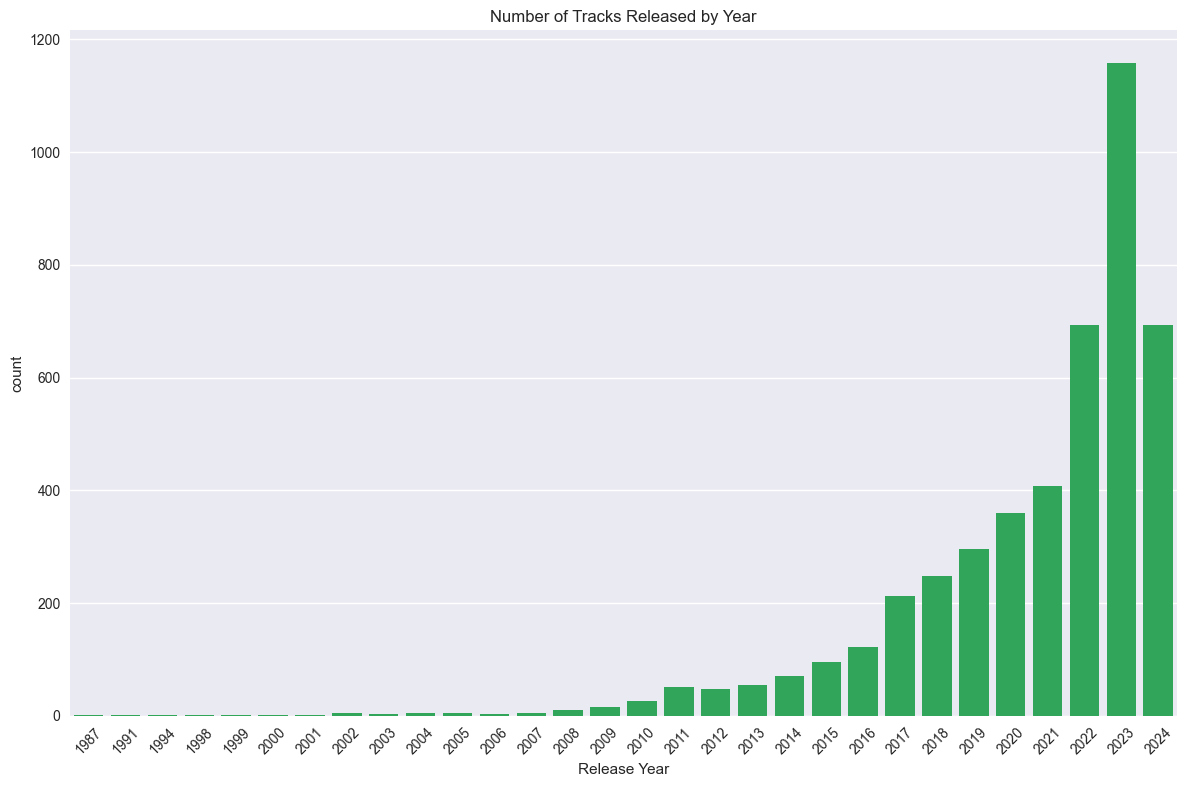

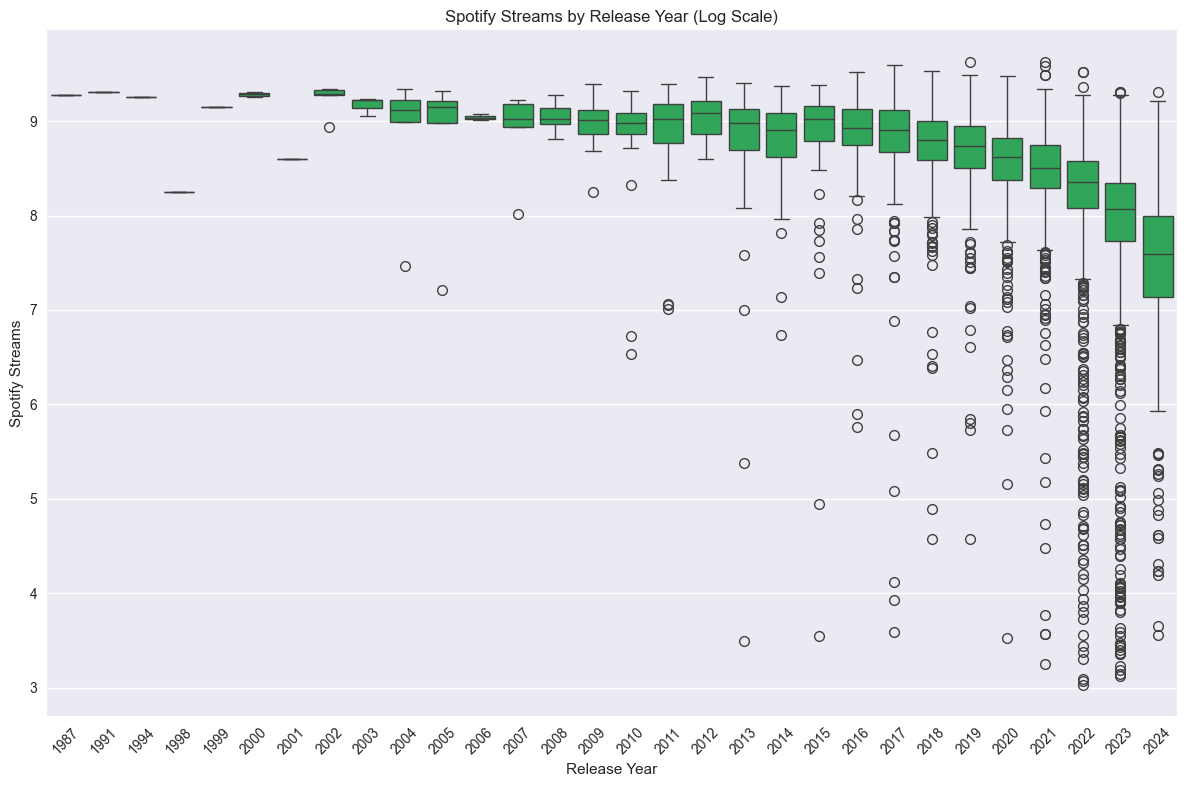

In [61]:
# Extract year and month (For Original df)
df['Release Year'] = df['Release Date'].dt.year
df['Release Month'] = df['Release Date'].dt.month

# Extract year and month (For Log df)
df_log['Release Year'] = df['Release Date'].dt.year
df_log ['Release Month'] = df['Release Date'].dt.month

# Analyze by release year
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Release Year',color='#1DB954')
plt.title('Number of Tracks Released by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Visualizations/temporal_trends.png', dpi=300, bbox_inches='tight')
plt.show()

# Streams by release year
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_log, x='Release Year', y='Spotify Streams',color='#1DB954')
plt.title('Spotify Streams by Release Year (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 5. Artist/Track Analysis

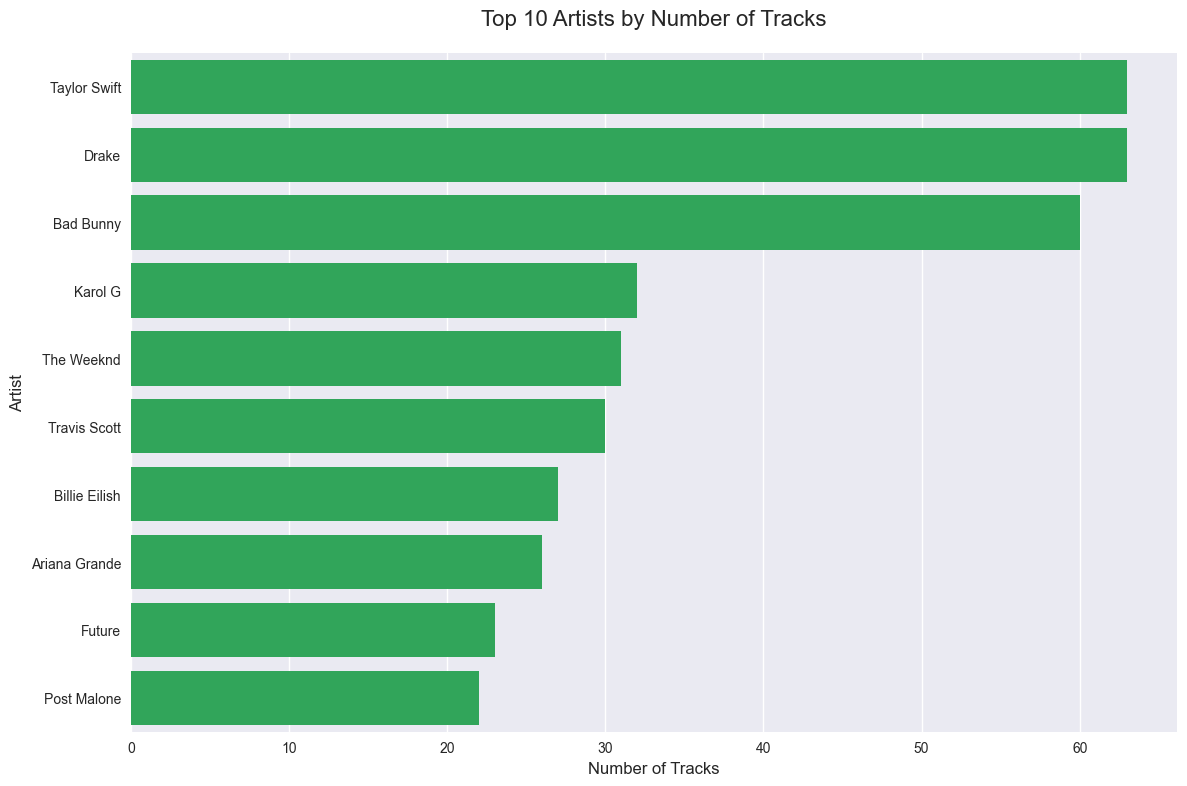

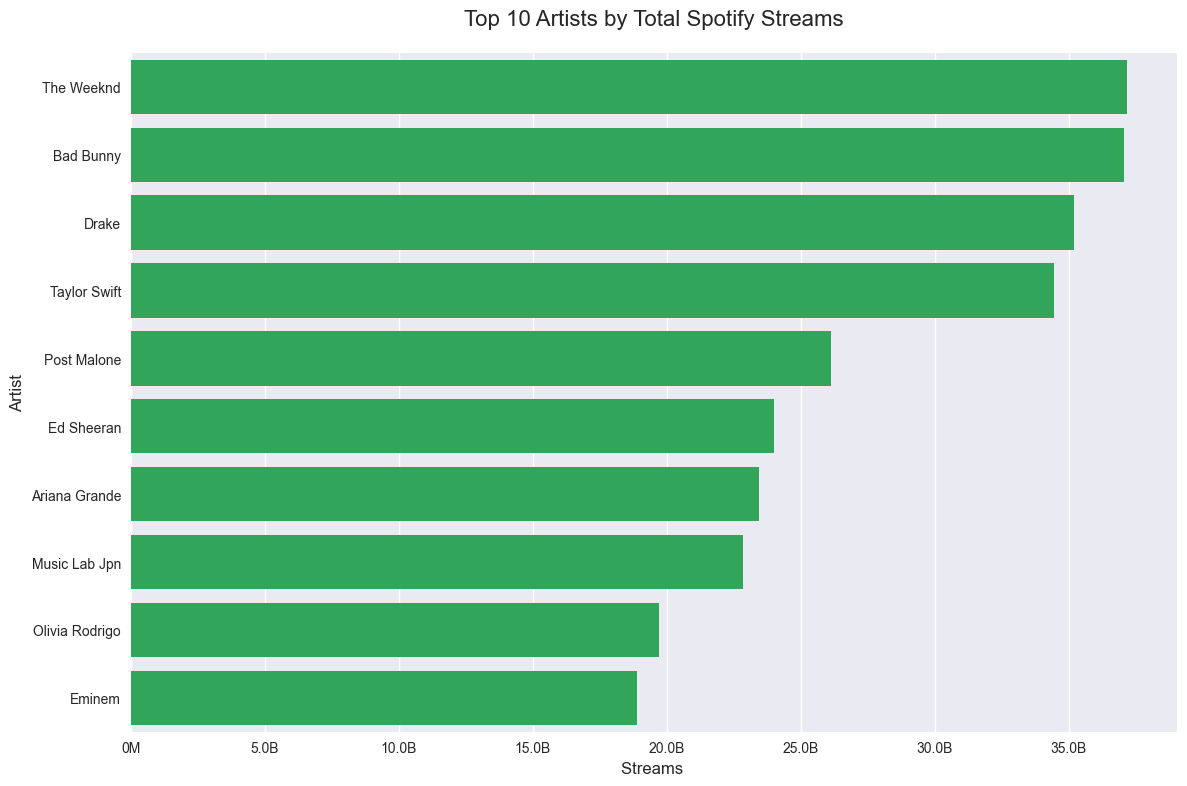

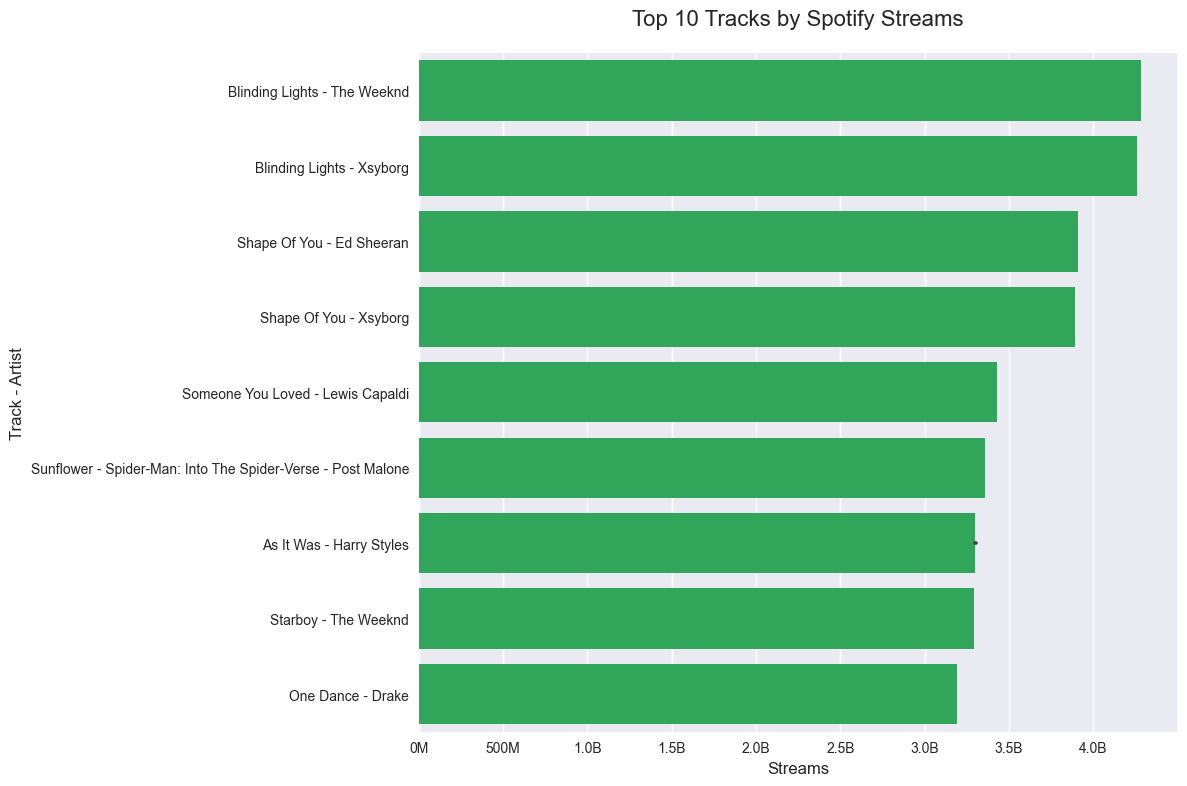

In [62]:
# Top artists by number of tracks
top_artists = df['Artist'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, color='#1DB954')
plt.title('Top 10 Artists by Number of Tracks',fontsize=16, pad=20)
plt.xlabel('Number of Tracks',fontsize=12)
plt.ylabel('Artist',fontsize=12)
plt.tight_layout()
plt.show()

# Top artists by streams
artist_streams = df.groupby('Artist')['Spotify Streams'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=artist_streams.values, y=artist_streams.index, color='#1DB954')
plt.title('Top 10 Artists by Total Spotify Streams',fontsize=16, pad=20)
plt.xlabel('Streams ',fontsize=12)
plt.ylabel('Artist',fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B' if x >= 1e9 else f'{x/1e6:.0f}M'))
plt.savefig('Visualizations/top_artists_streams.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Top tracks by streams
top_tracks = df.nlargest(10, 'Spotify Streams')[['Track', 'Artist', 'Spotify Streams']]
top_tracks['Track_Artist'] = top_tracks['Track'] + ' - ' + top_tracks['Artist']

plt.figure(figsize=(12, 8))
sns.barplot(data=top_tracks, x='Spotify Streams', y='Track_Artist', color='#1DB954')
plt.title('Top 10 Tracks by Spotify Streams', fontsize=16, pad=20)
plt.xlabel('Streams', fontsize=12)
plt.ylabel('Track - Artist', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B' if x >= 1e9 else f'{x/1e6:.0f}M'))
plt.tight_layout()
plt.show()

In [ ]:
# 6. Platform Comparison

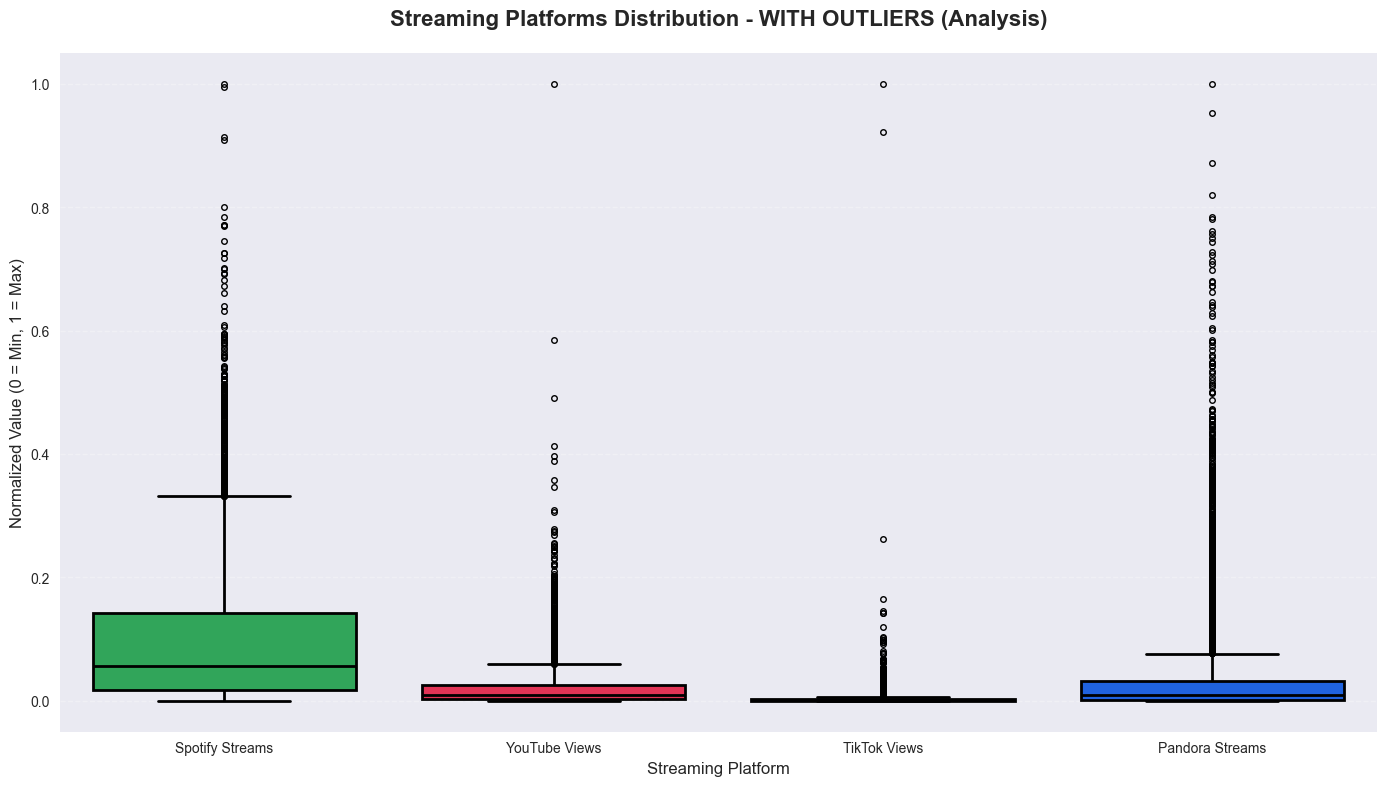

Outlier Analysis by Platform

🎵 Spotify Streams:
   • Total outliers: 320 (7.0% of data)
   • Range: -0.172 to 0.332
   • Top outlier values: [0.47443547 0.3860867  0.77118735]

🎵 YouTube Views:
   • Total outliers: 505 (11.0% of data)
   • Range: -0.032 to 0.060
   • Top outlier values: [0.0671517  0.41270617 0.07700743]

🎵 TikTok Views:
   • Total outliers: 624 (13.6% of data)
   • Range: -0.003 to 0.006
   • Top outlier values: [0.02286254 0.01444534 0.06261451]

🎵 Pandora Streams:
   • Total outliers: 704 (15.3% of data)
   • Range: -0.043 to 0.077
   • Top outlier values: [0.12999259 0.09464819 0.09061396]

TOP OUTLIER TRACKS (The Viral Hits)

Tracks that are extreme outliers:
• As It Was - Harry Styles
  Platform: Spotify Streams
  Normalized: 0.771 | Original: 3,301,814,535

• Flowers - Miley Cyrus
  Platform: Spotify Streams
  Normalized: 0.474 | Original: 2,031,280,633

• Bathroom Floor - Kids With Buns
  Platform: YouTube Views
  Normalized: 0.413 | Original: 6,736,502,312

•

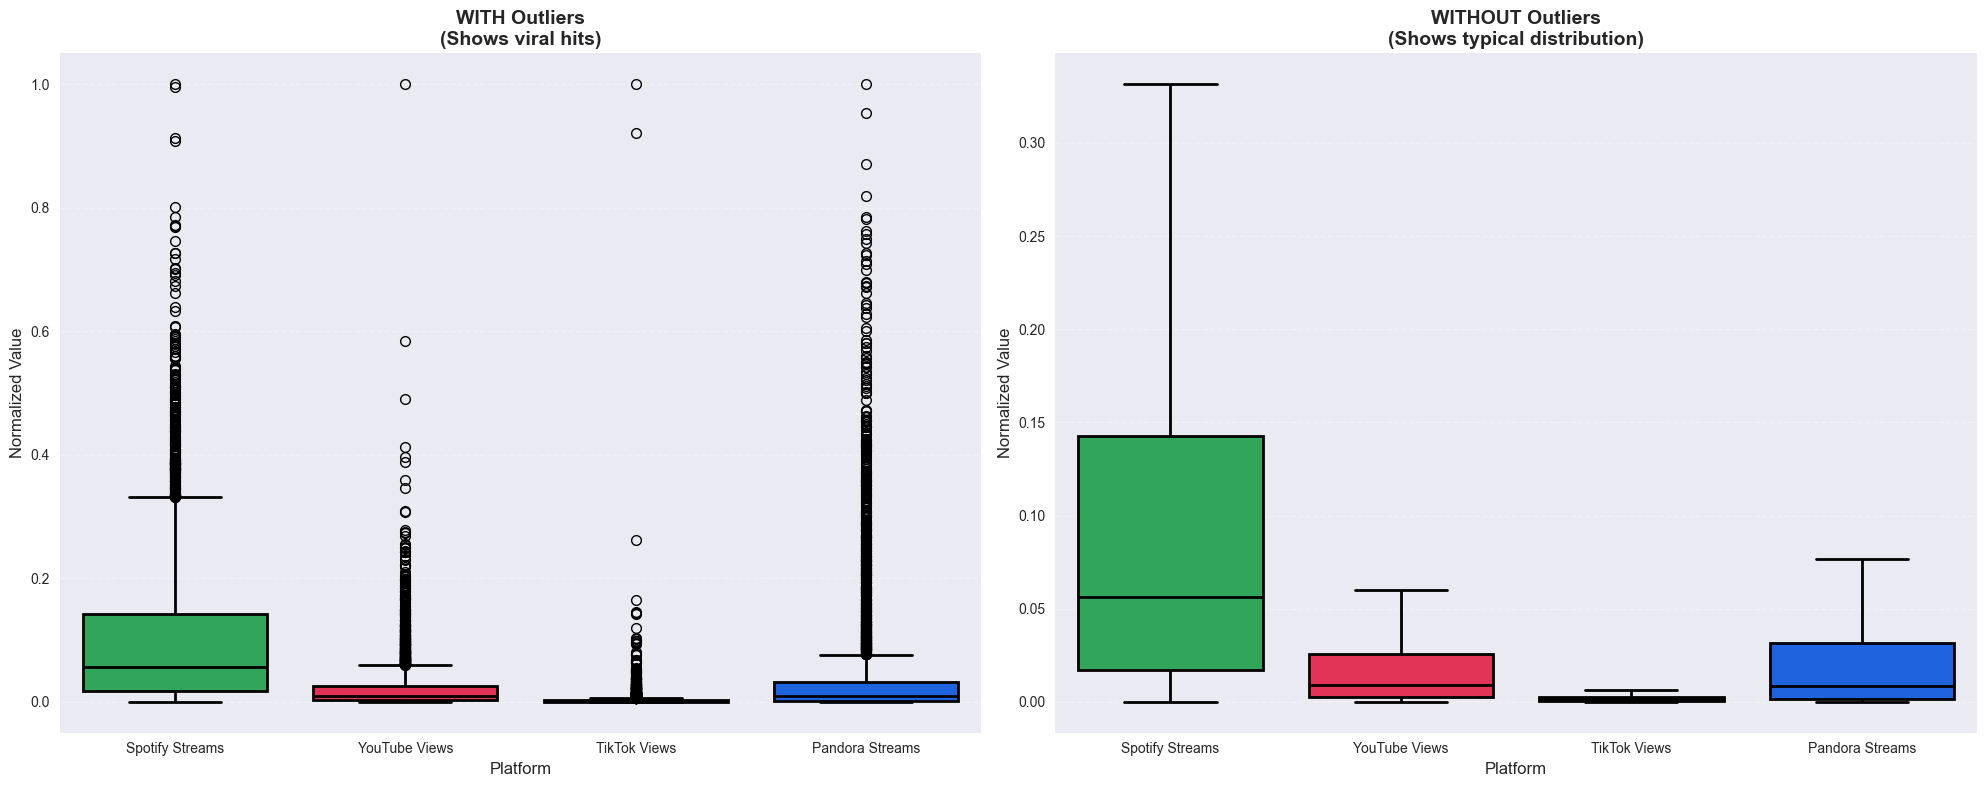

In [63]:
# Compare streaming platforms
platform_cols = ['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Pandora Streams']

# Normalize for comparison
platform_df = df[platform_cols].copy()
platform_df = platform_df.apply(lambda x: x/x.max(), axis=0)  # Min-max normalization

# Graph with Outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=platform_df,
           palette=['#1DB954', '#FF1744', '#000000', '#005AFF'],
           linewidth=2,
           fliersize=4)

plt.title('Streaming Platforms Distribution - WITH OUTLIERS (Analysis)',
          fontsize=16, pad=20, fontweight='bold')
plt.ylabel('Normalized Value (0 = Min, 1 = Max)', fontsize=12)
plt.xlabel('Streaming Platform', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Identify Outliers
print("="*60)
print("Outlier Analysis by Platform")
print("="*60)

def identify_outliers(data, column_name):
    """Identify Outliers with IQR"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

# Outliers by platform
outlier_summary = {}
for platform in platform_cols:
    outliers, lower, upper = identify_outliers(platform_df[platform], platform)
    outlier_summary[platform] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(platform_df)) * 100,
        'values': outliers.values[:5] 
    }

    print(f"\n🎵 {platform}:")
    print(f"   • Total outliers: {len(outliers)} ({(len(outliers)/len(platform_df)*100):.1f}% of data)")
    print(f"   • Range: {lower:.3f} to {upper:.3f}")
    if len(outliers) > 0:
        print(f"   • Top outlier values: {outliers.values[:3]}")

# Identify songs with outliers
print(f"\n{'='*60}")
print("TOP OUTLIER TRACKS (The Viral Hits)")
print("="*60)

# Songs with outliers in multiple platforms
outlier_tracks = []
for platform in platform_cols:
    outliers, lower, upper = identify_outliers(platform_df[platform], platform)
    outlier_indices = outliers.index
    # Add Information of the original track
    for idx in outlier_indices[:3]:  # Top 3 outliers
        track_info = {
            'track': df.loc[idx, 'Track'],
            'artist': df.loc[idx, 'Artist'],
            'platform': platform,
            'normalized_value': platform_df.loc[idx, platform],
            'original_value': df.loc[idx, platform]
        }
        outlier_tracks.append(track_info)

# Extreme tracks
outlier_df = pd.DataFrame(outlier_tracks)
top_outliers = outlier_df.nlargest(10, 'normalized_value')

print("\nTracks that are extreme outliers:")
for _, row in top_outliers.iterrows():
    print(f"• {row['track']} - {row['artist']}")
    print(f"  Platform: {row['platform']}")
    print(f"  Normalized: {row['normalized_value']:.3f} | Original: {row['original_value']:,.0f}")
    print()

print("="*60)
print("VISUALIZATION COMPARISON")
print("="*60)

# Comparision graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# With outliers
sns.boxplot(data=platform_df,
           palette=['#1DB954', '#FF1744', '#000000', '#005AFF'],
           linewidth=2, ax=ax1)
ax1.set_title('WITH Outliers\n(Shows viral hits)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Normalized Value', fontsize=12)
ax1.set_xlabel('Platform', fontsize=12)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Without outliers
sns.boxplot(data=platform_df,
           palette=['#1DB954', '#FF1744', '#000000', '#005AFF'],
           linewidth=2, showfliers=False, ax=ax2)
ax2.set_title('WITHOUT Outliers\n(Shows typical distribution)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Normalized Value', fontsize=12)
ax2.set_xlabel('Platform', fontsize=12)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('Visualizations/platform_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# 7. Explicit Content Analysis

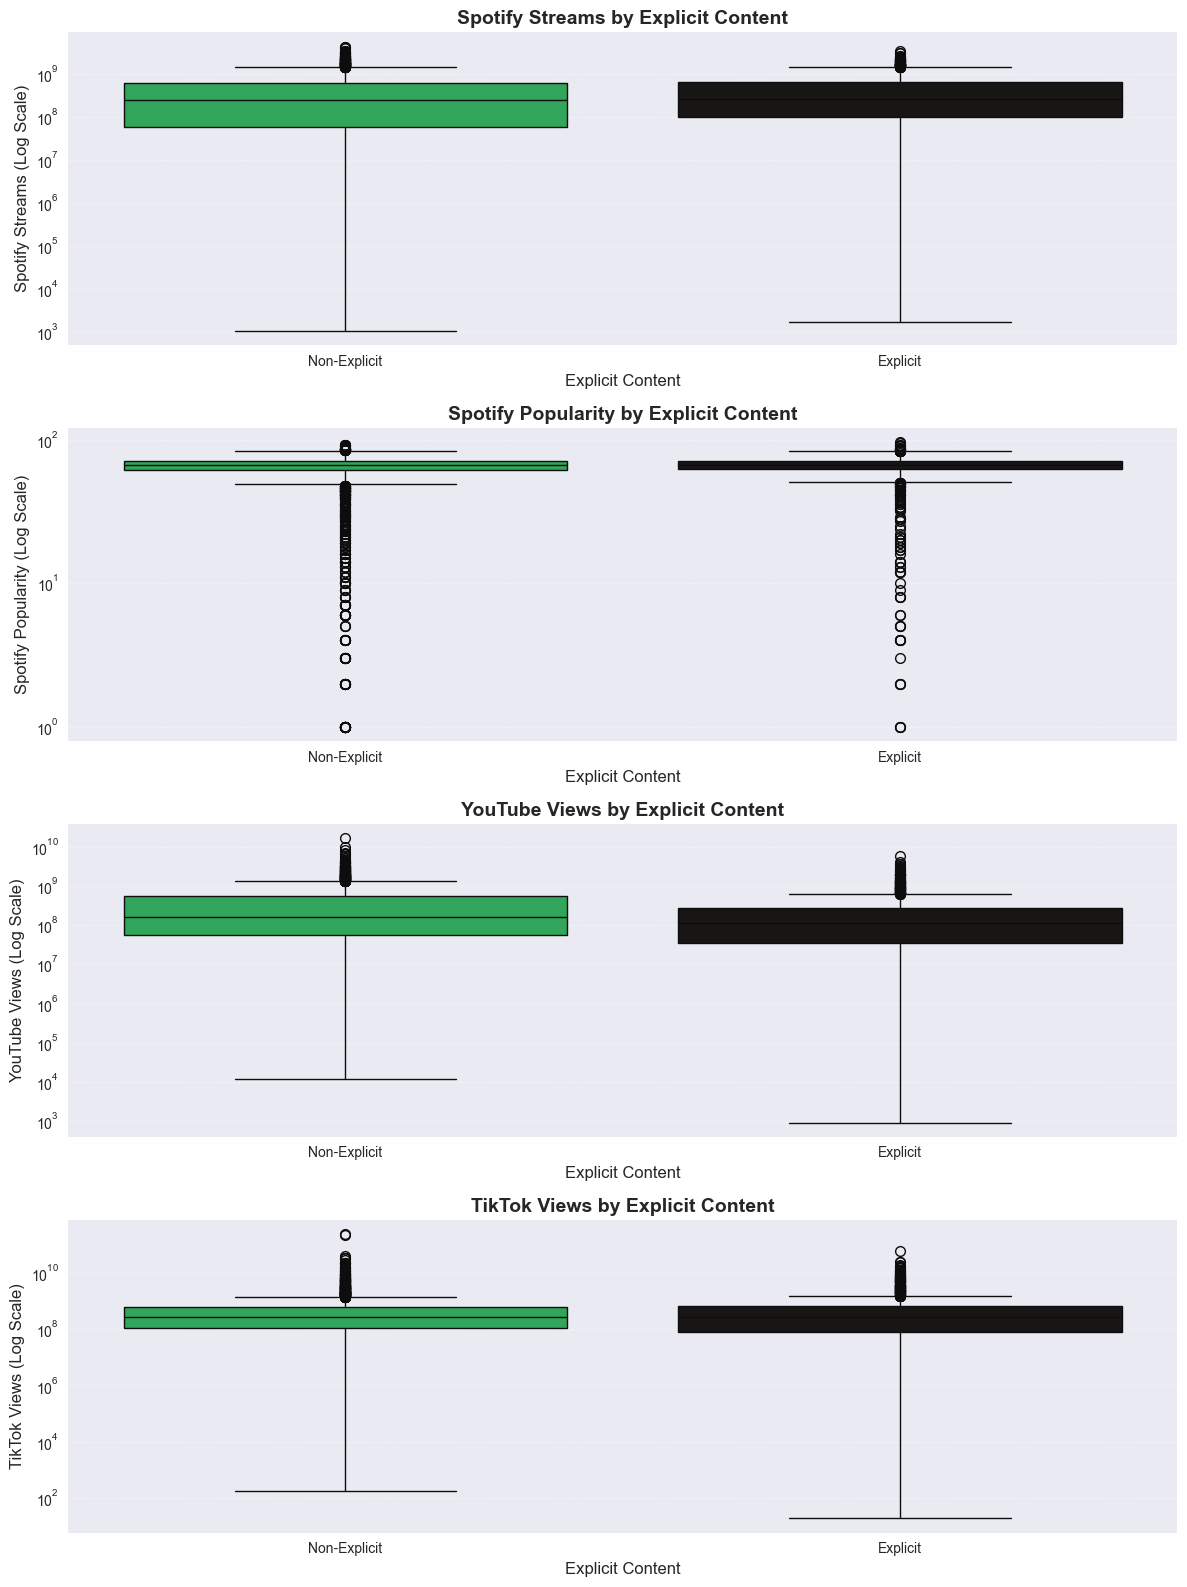

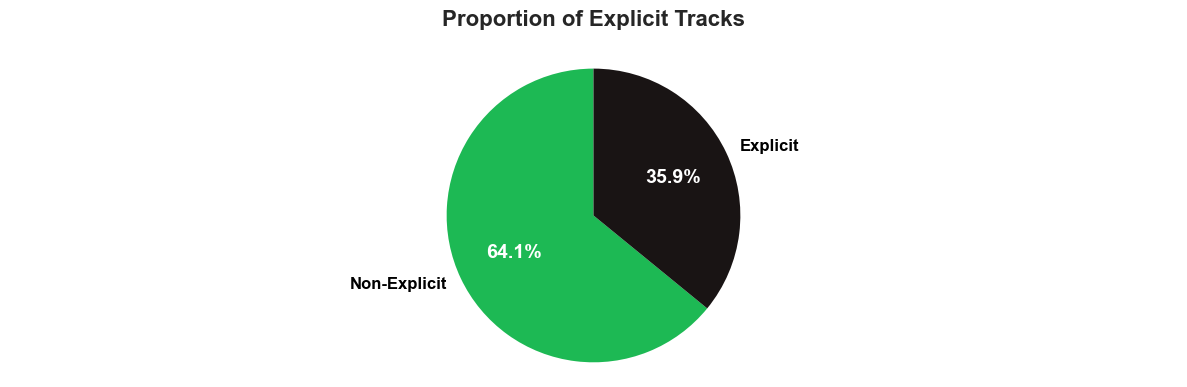

Explicit Content Summary
Total tracks: 4,598
Explicit tracks: 1,651 (35.9%)
Non-explicit tracks: 2,947 (64.1%)


In [64]:
# Compare explicit vs non-explicit tracks
if 'Explicit Track' in df.columns:
    plt.figure(figsize=(12, 16))

    metrics_to_compare = ['Spotify Streams', 'Spotify Popularity',
                         'YouTube Views', 'TikTok Views']

    for i, metric in enumerate(metrics_to_compare, 1):
        plt.subplot(4, 1, i)
        df_plot = df.copy()
        df_plot['Explicit_Label'] = df_plot['Explicit Track'].map({1: 'Explicit', 0: 'Non-Explicit'})
        sns.boxplot(data=df_plot, x='Explicit_Label', y=metric,
                   hue='Explicit_Label', palette=['#1DB954', '#191414'],
                   legend=False)
        plt.yscale('log')
        plt.title(f'{metric} by Explicit Content', fontsize=14, fontweight='bold')
        plt.xlabel('Explicit Content', fontsize=12)
        plt.ylabel(f'{metric} (Log Scale)', fontsize=12)
        plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    # Proportion of explicit tracks
    explicit_pct = df['Explicit Track'].value_counts(normalize=True) * 100
    plt.figure(figsize=(12, 4))

    labels = ['Non-Explicit' if not x else 'Explicit' for x in explicit_pct.index]
    colors = ['#1DB954' if not x else '#191414' for x in explicit_pct.index]

    wedges, texts, autotexts = plt.pie(explicit_pct.values,
                                      labels=labels,
                                      autopct='%1.1f%%',
                                      colors=colors,
                                      startangle=90,
                                      textprops={'fontsize': 12, 'fontweight': 'bold'})

    # Better visualization of the text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(14)

    for text in texts:
        text.set_color('black')
        text.set_fontweight('bold')
        text.set_fontsize(12)

    plt.title('Proportion of Explicit Tracks', fontsize=16, pad=20, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

    print("="*50)
    print("Explicit Content Summary")
    print("="*50)

    total_tracks = len(df)
    explicit_count = df['Explicit Track'].value_counts()
    explicit_pct_correcto = df['Explicit Track'].value_counts(normalize=True) * 100

    print(f"Total tracks: {total_tracks:,}")

    # For 1 and 0 values
    print(f"Explicit tracks: {explicit_count.get(1, 0):,} ({explicit_pct_correcto.get(1, 0):.1f}%)")
    print(f"Non-explicit tracks: {explicit_count.get(0, 0):,} ({explicit_pct_correcto.get(0, 0):.1f}%)")

else:
    print("'Explicit Track' column not found in dataset")
    print("Skipping explicit content analysis")

In [ ]:
# 8. Key Insights & Recommendations

In [65]:
print("\n" + "="*60)
print("Summary Statistics & Key Metrics".center(60))
print("="*60)

# 1. Overall Dataset Stats
print(f"\nDataset Overview:")
print(f"   • Total tracks analyzed: {len(df):,}")
print(f"   • Date range: {df['Release Year'].min()} - {df['Release Year'].max()}")
print(f"   • Unique artists: {df['Artist'].nunique():,}")

# 2. Top Performers Across All Metrics
print(f"\nTop Performers:")

# Top track by Spotify Streams
top_spotify = df.loc[df['Spotify Streams'].idxmax()]
print(f"   • Top Spotify Track: '{top_spotify['Track']}' by {top_spotify['Artist']}")
print(f"     Streams: {top_spotify['Spotify Streams']:,}")

# Top track by YouTube Views
top_youtube = df.loc[df['YouTube Views'].idxmax()]
print(f"   • Top YouTube Track: '{top_youtube['Track']}' by {top_youtube['Artist']}")
print(f"     Views: {top_youtube['YouTube Views']:,}")

# Top track by TikTok Views
top_tiktok = df.loc[df['TikTok Views'].idxmax()]
print(f"   • Top TikTok Track: '{top_tiktok['Track']}' by {top_tiktok['Artist']}")
print(f"     Views: {top_tiktok['TikTok Views']:,}")

# 3. Platform Correlations
print(f"\nPlatform Correlations:")
spotify_youtube_corr = df['Spotify Streams'].corr(df['YouTube Views'])
spotify_tiktok_corr = df['Spotify Streams'].corr(df['TikTok Views'])
youtube_tiktok_corr = df['YouTube Views'].corr(df['TikTok Views'])

print(f"   • Spotify ↔ YouTube: {spotify_youtube_corr:.3f}")
print(f"   • Spotify ↔ TikTok: {spotify_tiktok_corr:.3f}")
print(f"   • YouTube ↔ TikTok: {youtube_tiktok_corr:.3f}")

# 4. Temporal Insights
print(f"\nTemporal Insights:")
peak_year = df['Release Year'].mode()[0]
tracks_peak_year = df[df['Release Year'] == peak_year].shape[0]
print(f"   • Peak release year: {peak_year} ({tracks_peak_year:,} tracks)")

# Average streams by top release years
top_years_streams = df.groupby('Release Year')['Spotify Streams'].mean().sort_values(ascending=False).head(3)
print(f"   • Best performing years by avg streams:")
for year, avg_streams in top_years_streams.items():
    print(f"     - {int(year)}: {avg_streams:,.0f} avg streams")

# 5. Platform Distribution Summary
print(f"\nPlatform Distribution:")
platform_medians = {
    'Spotify': df['Spotify Streams'].median(),
    'YouTube': df['YouTube Views'].median(),
    'TikTok': df['TikTok Views'].median()
}

for platform, median_val in platform_medians.items():
    print(f"   • {platform} median: {median_val:,.0f}")

# 6. Content Type Distribution
if 'Explicit Track' in df.columns:
    explicit_pct = (df['Explicit Track'].sum() / len(df)) * 100
    print(f"\nContent Distribution:")
    print(f"   • Explicit tracks: {explicit_pct:.1f}%")
    print(f"   • Non-explicit tracks: {100-explicit_pct:.1f}%")

# 7. Cross-Platform Success
print(f"\nCross-Platform Analysis:")
# Songs that are in top 10% across multiple platforms
spotify_top10 = df['Spotify Streams'].quantile(0.9)
youtube_top10 = df['YouTube Views'].quantile(0.9)
tiktok_top10 = df['TikTok Views'].quantile(0.9)

cross_platform_hits = df[
    (df['Spotify Streams'] >= spotify_top10) &
    (df['YouTube Views'] >= youtube_top10) &
    (df['TikTok Views'] >= tiktok_top10)
]

print(f"   • Cross-platform hits (top 10% on all): {len(cross_platform_hits)} tracks")
if len(cross_platform_hits) > 0:
    print(f"   • Example: '{cross_platform_hits.iloc[0]['Track']}' by {cross_platform_hits.iloc[0]['Artist']}")

print(f"\n" + "="*60)
print("End of Analysis")
print("="*60)


              Summary Statistics & Key Metrics              

Dataset Overview:
   • Total tracks analyzed: 4,598
   • Date range: 1987 - 2024
   • Unique artists: 1,998

Top Performers:
   • Top Spotify Track: 'Blinding Lights' by The Weeknd
     Streams: 4,281,468,720
   • Top YouTube Track: 'Baby Shark' by Pinkfong
     Views: 16,322,756,555
   • Top TikTok Track: 'Monkeys Spinning Monkeys' by Kevin Macleod
     Views: 233,232,311,463

Platform Correlations:
   • Spotify ↔ YouTube: 0.426
   • Spotify ↔ TikTok: 0.040
   • YouTube ↔ TikTok: 0.009

Temporal Insights:
   • Peak release year: 2023 (1,158 tracks)
   • Best performing years by avg streams:
     - 1991: 2,021,910,364 avg streams
     - 2000: 1,921,766,550 avg streams
     - 1987: 1,879,386,440 avg streams

Platform Distribution:
   • Spotify median: 239,850,720
   • YouTube median: 148,269,610
   • TikTok median: 266,064,027

Content Distribution:
   • Explicit tracks: 35.9%
   • Non-explicit tracks: 64.1%

Cross-Platform 